# **Predicting Mortgage Backed Securities Prepayment Risk Prediction**

# **Second Task : EDA(Exploratory Data Analysis)**

The different steps for this second task are as follows:
1. Univariate Analysis.
2. BiVariate Analysis
3. Multivariate Analysis

## Importing Data & Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib
warnings.filterwarnings("always")

%matplotlib inline

# First Look at the data


In [ ]:
data = pd.read_csv('LoanExport.csv')
data.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-63-674adbca6759>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('LoanExport.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,...,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,...,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44
7,0,199902,X,202901,36740,0,1,O,72,20,...,32800,F199Q1001824,N,360,1,NO,WELLSFARGOBANKNA,1,3,145
8,0,199902,Y,202710,25540,30,1,O,95,38,...,6400,F199Q1079744,P,345,1,Ot,Other servicers,0,0,64
9,0,199902,Y,202901,48620,30,1,O,95,27,...,67000,F199Q1196318,P,360,1,Ot,WELLSFARGOBANKNA,1,104,212


# **Exploratory Data Analysis(EDA)**

## Defining Needed Functions for EDA

In [ ]:
def draw_histogram(col,plottitle,xlabel,ylabel):
  plt.figure(figsize=(30,10))
  plt.hist(data[col],edgecolor='black')
  plt.title(plottitle)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
# function to draw histogram to know the density of any categorical data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def draw_boxplot(col):
  sns.boxplot(data[col])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def draw_piechart(col,label):
  plt.figure(figsize=(10,10))
  plt.pie(data[col].value_counts(),shadow=True ,autopct='%.3f',labels=label)
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def draw_scatterplot(col1,col2):
  plt.scatter(data[col1],data[col2])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def calc_linearsummary(feature, target):
  y = data[target]
  x = data[feature]
  x = sm.add_constant(x)
  model = sm.OLS(y, x).fit()
  print(model.summary())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def draw_join_plot(colx,coly):
  sns.jointplot(x=colx,y=coly,kind='reg')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def handle_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower=Q1-(1.5*IQR)
  upper=Q3+(1.5*IQR)
  return lower , upper

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def label_encoding(col):
  label_encoder = preprocessing.LabelEncoder()
  data[col]= label_encoder.fit_transform(data[col])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def one_hot_encoding(cols):
  one_hot_encoded_data = pd.get_dummies(data, columns = cols)
  return one_hot_encoded_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Exploratory Data Analysis(EDA)**

## Data Preprocessing & EDA

In [ ]:
data.shape

(291451, 28)

In [ ]:
# Checking informations about our features
data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

# 1. Data Cleaning

## Missing values treatment

In [ ]:
# Checking for missing values
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [ ]:
#Check if there's any categorical features in our data
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

###  MaturityDate:


In [ ]:
# Convert date feature to datetime format
data['MaturityDate'] = data['MaturityDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###  FirstPaymentDate :


In [ ]:
data['FirstPaymentDate'] = data['FirstPaymentDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Visualize the change on dtypes of features
data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291451 non-null  int64         
 1   FirstPaymentDate    291451 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291451 non-null  object        
 3   MaturityDate        291451 non-null  datetime64[ns]
 4   MSA                 291451 non-null  object        
 5   MIP                 291451 non-null  int64         
 6   Units               291451 non-null  int64         
 7   Occupancy           291451 non-null  object        
 8   OCLTV               291451 non-null  int64         
 9   DTI                 291451 non-null  int64         
 10  OrigUPB             291451 non-null  int64         
 11  LTV                 291451 non-null  int64         
 12  OrigInterestRate    291451 non-null  float64       
 13  Channel             291451 no

In [ ]:
#View description of all of our features
num1_cols = data.describe(include='all')
num1_cols

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-8997d036efc4>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  num1_cols = data.describe(include='all')
<ipython-input-24-8997d036efc4>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  num1_cols = data.describe(include='a

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451,291451,291451,291451,291451.000000,291451.000000,291451,291451.000000,291451.000000,...,291451,291451,291451,291451.000000,291451,266457,291451,291451.000000,291451.000000,291451.000000
unique,NaN,66,3,96,392,NaN,NaN,3,NaN,NaN,...,1767,291451,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,1999-05-01 00:00:00,N,2029-04-01 00:00:00,X,NaN,NaN,O,NaN,NaN,...,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,104071,184154,104210,39100,NaN,NaN,276131,NaN,NaN,...,2582,1,123404,NaN,187335,76943,64043,NaN,NaN,NaN
first,NaN,1999-01-01 00:00:00,NaN,2024-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2013-03-01 00:00:00,NaN,2043-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,708.936991,NaN,NaN,NaN,NaN,9.216685,1.026022,NaN,76.960529,30.033453,...,NaN,NaN,NaN,359.835375,NaN,NaN,NaN,0.197848,1.837729,60.805291
std,68.408791,NaN,NaN,NaN,NaN,12.648273,0.202986,NaN,15.236154,13.203974,...,NaN,NaN,NaN,2.286939,NaN,NaN,NaN,0.398378,8.809392,46.142599
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,70.000000,22.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,34.000000


In [ ]:
#Count number of distinct elements in axis 0.
data.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore              370
FirstPaymentDate          66
FirstTimeHomebuyer         3
MaturityDate              96
MSA                      392
MIP                       37
Units                      5
Occupancy                  3
OCLTV                    102
DTI                       66
OrigUPB                  375
LTV                       97
OrigInterestRate         254
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode              1767
LoanSeqNum            291451
LoanPurpose                3
OrigLoanTerm              61
NumBorrowers               3
SellerName                20
ServicerName              20
EverDelinquent             2
MonthsDelinquent         174
MonthsInRepayment        212
dtype: int64

In [ ]:
data["EverDelinquent"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    233788
1     57663
Name: EverDelinquent, dtype: int64

In [ ]:
print("Seller Name size: \n",data.SellerName.value_counts(),"\n\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Seller Name size: 
 Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64 




In [ ]:
#Return unique values based on a hash table.
data['FirstTimeHomebuyer'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['N', 'X', 'Y'], dtype=object)

In [ ]:
# X means No
# Y means Yes
# X means Unknown value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#PPM (Prepayment Penalty Indicator):

In [ ]:
data['PPM'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['N', 'X', 'Y'], dtype=object)

In [ ]:
data['NumBorrowers'].unique()
# X  means unknown value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['2', '1', 'X '], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

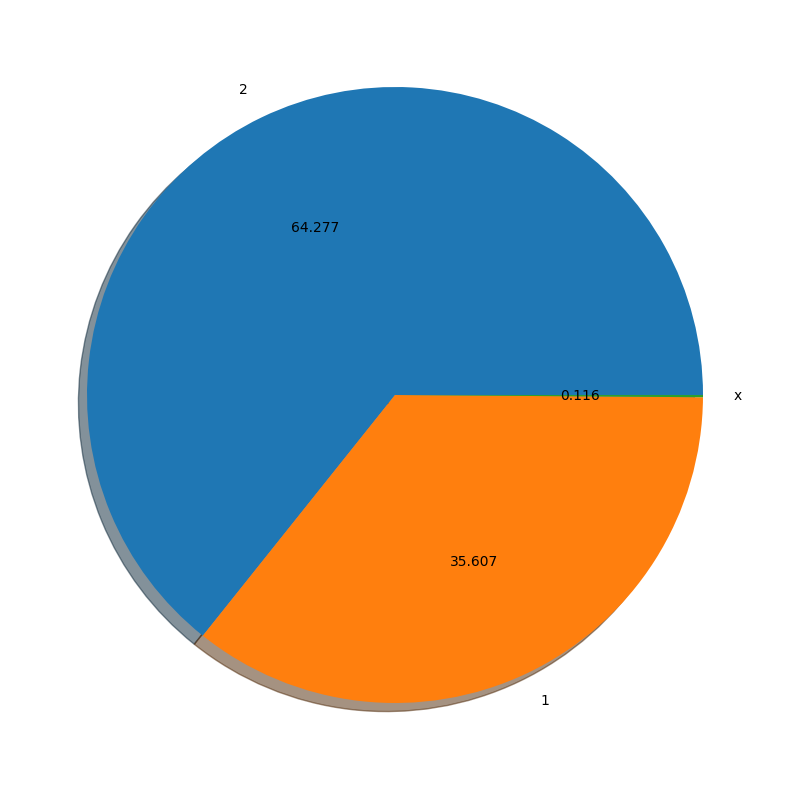

In [ ]:
#draw piechart of NumBorrowers to see the distribution of its values
label_arr=['2','1','x']
draw_piechart('NumBorrowers',label_arr)

#Data Encoding (Label Encoding)

# Data Encoding

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


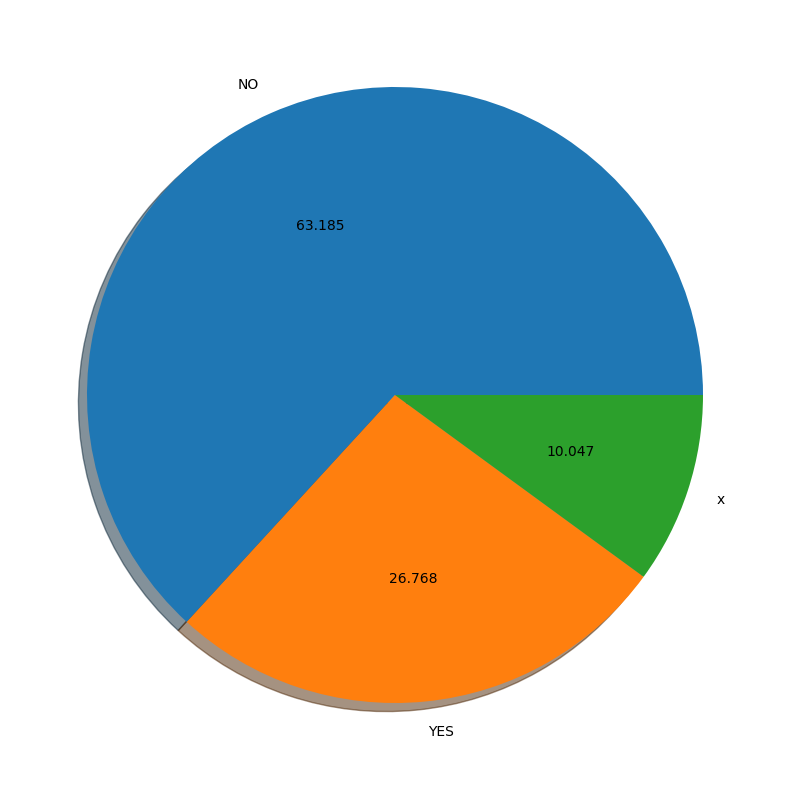

In [ ]:
#draw piechart of FirstTimeHomebuyer to see the distribution of its values

label_arr=['NO','YES','x']
draw_piechart('FirstTimeHomebuyer',label_arr)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


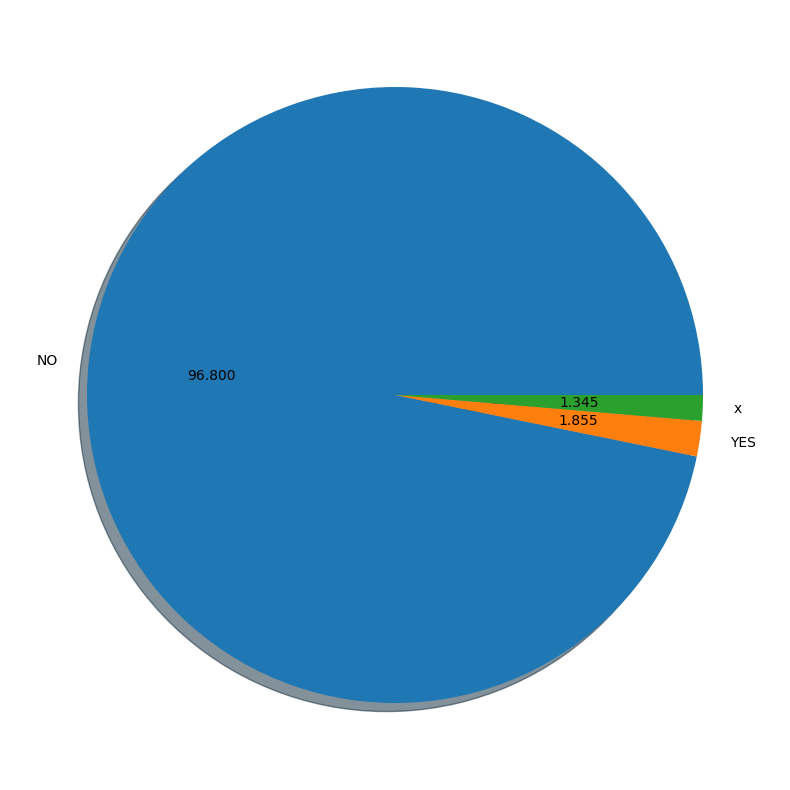

In [ ]:
#draw piechart of PPM to see the distribution of its values
label_arr=['NO','YES','x']
draw_piechart('PPM',label_arr)

#Occupacy

In [ ]:
data['Occupancy'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['O', 'I', 'S'], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


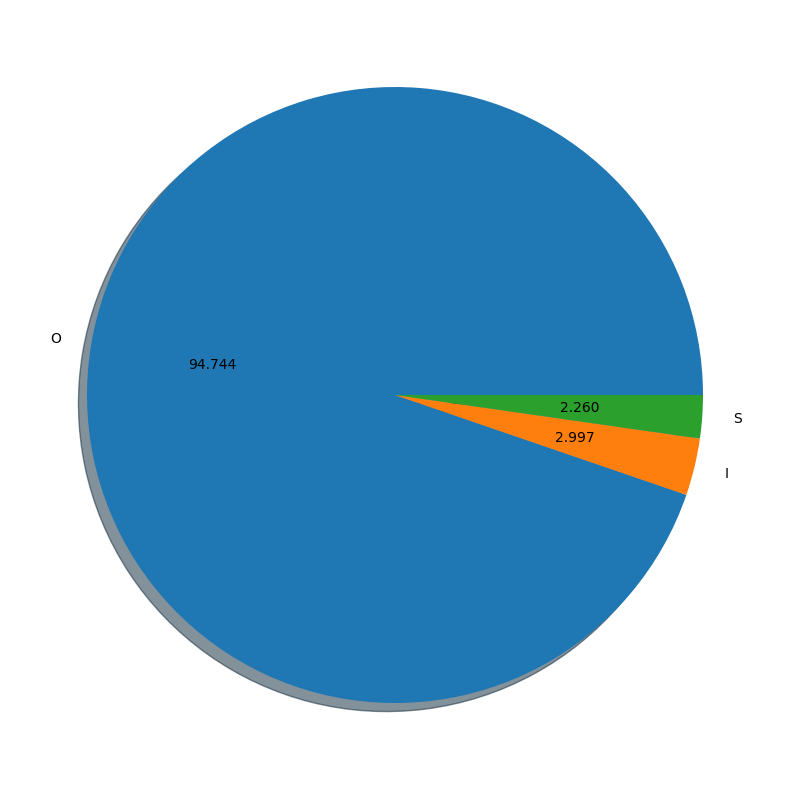

In [ ]:
#draw piechart of Occupancy to see the distribution of its values
label_arr=['O','I','S']
draw_piechart('Occupancy',label_arr)

In [ ]:
data['PostalCode'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


94500    2582
30000    2374
48100    2166
85200    2155
48000    1976
         ... 
79500       1
26600       1
41400       1
36900       1
41300       1
Name: PostalCode, Length: 1767, dtype: int64

In [ ]:
data['LoanPurpose'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['P', 'N', 'C'], dtype=object)

In [ ]:
data['LoanPurpose'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


P    123404
N    110036
C     58011
Name: LoanPurpose, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


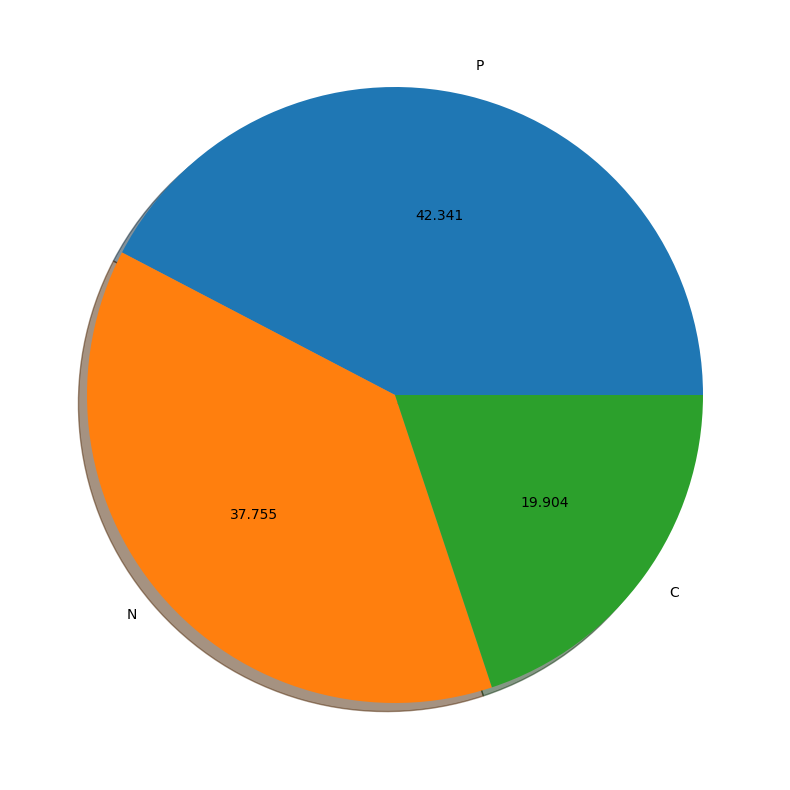

In [ ]:
#draw piechart of LoanPurpose to see the distribution of its values

label_arr=['P','N','C']
draw_piechart('LoanPurpose',label_arr)

In [ ]:
data['Channel'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['T', 'R', 'C', 'B'], dtype=object)

#Data Encoding (Label Encoding)

#UNIVARIATE ANALYSIS:

#Histogram

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


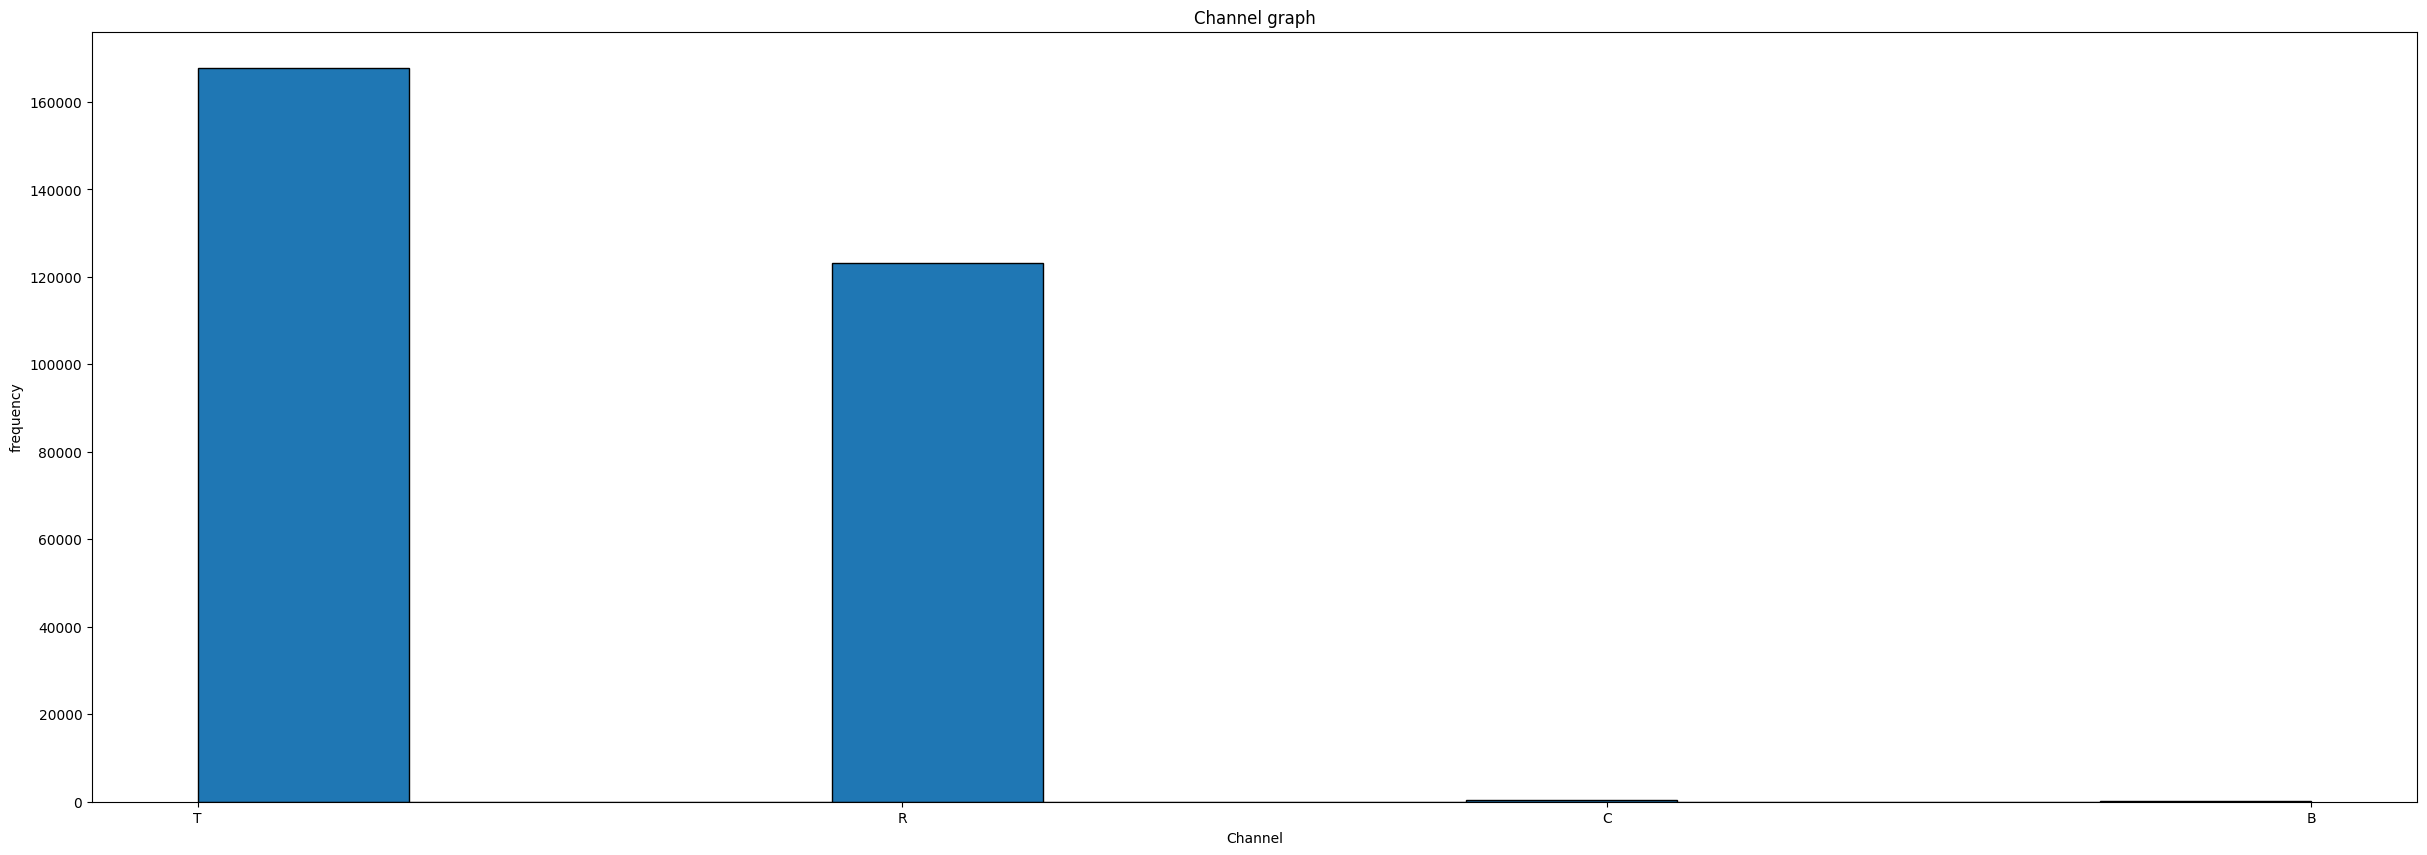

In [ ]:
# Draw histogram to know the density of out categorical data: Channel
draw_histogram('Channel','Channel graph','Channel','frequency')

In [ ]:
#Convert categorial feature to numerical one by label_encoding function defined earlier
label_encoding('Channel')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['PropertyState'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['IL', 'CO', 'KS', 'CA', 'NJ', 'WI', 'FL', 'CT', 'GA', 'TX', 'MD',
       'MA', 'SC', 'WY', 'NC', 'AZ', 'IN', 'MS', 'NY', 'WA', 'AR', 'VA',
       'MN', 'LA', 'PA', 'OR', 'RI', 'UT', 'MI', 'TN', 'AL', 'MO', 'IA',
       'NM', 'NV', 'VT', 'OH', 'NE', 'HI', 'ID', 'PR', 'DC', 'GU', 'KY',
       'NH', 'SD', 'ME', 'MT', 'OK', 'WV', 'DE', 'ND', 'AK'], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


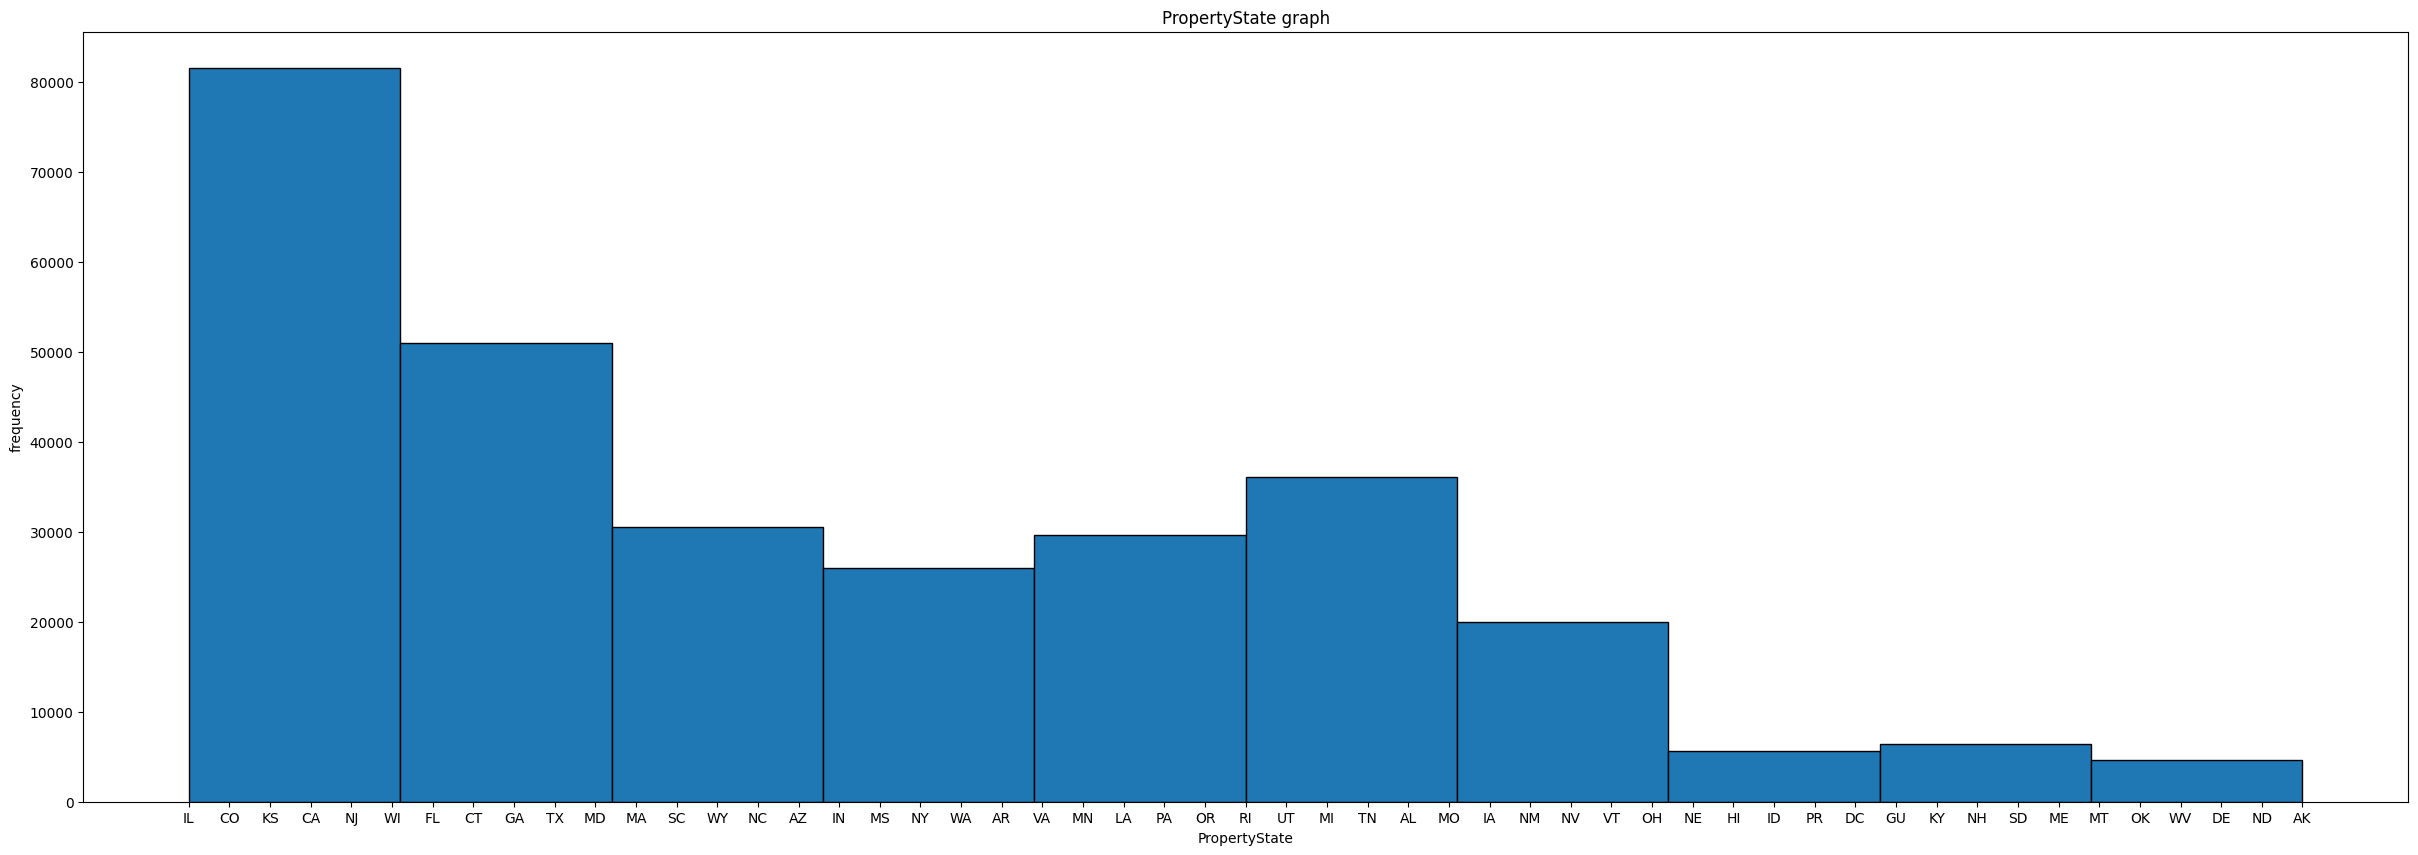

In [ ]:
# Draw histogram to know the density of out categorical data: PropertyState
draw_histogram('PropertyState','PropertyState graph','PropertyState','frequency')

In [ ]:
#Convert it to numerical
label_encoding('PropertyState')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['PropertyType'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH', 'X '], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


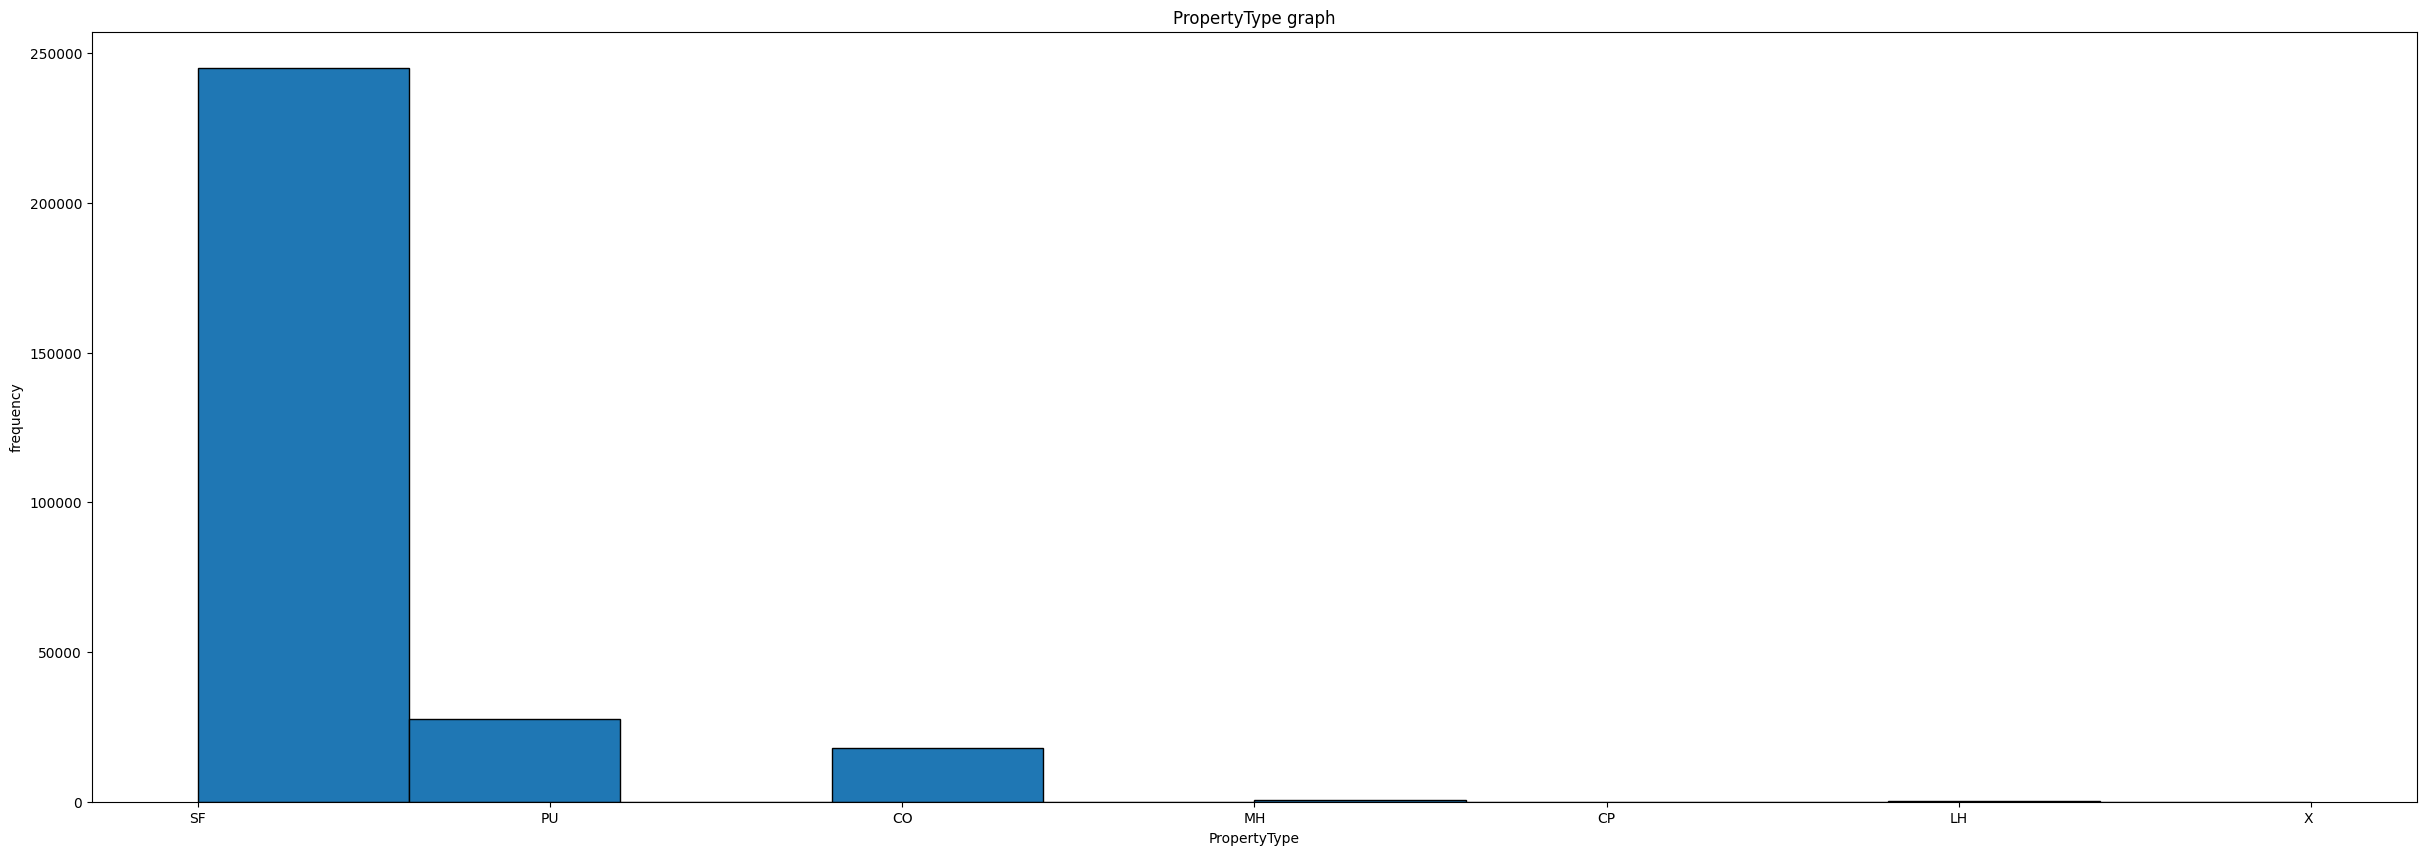

In [ ]:
# Draw histogram to know the density of out categorical data: PropertyType

draw_histogram('PropertyType','PropertyType graph','PropertyType','frequency')

In [ ]:
#Convert it to numerical
label_encoding('PropertyType')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#BAR GRAPH:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


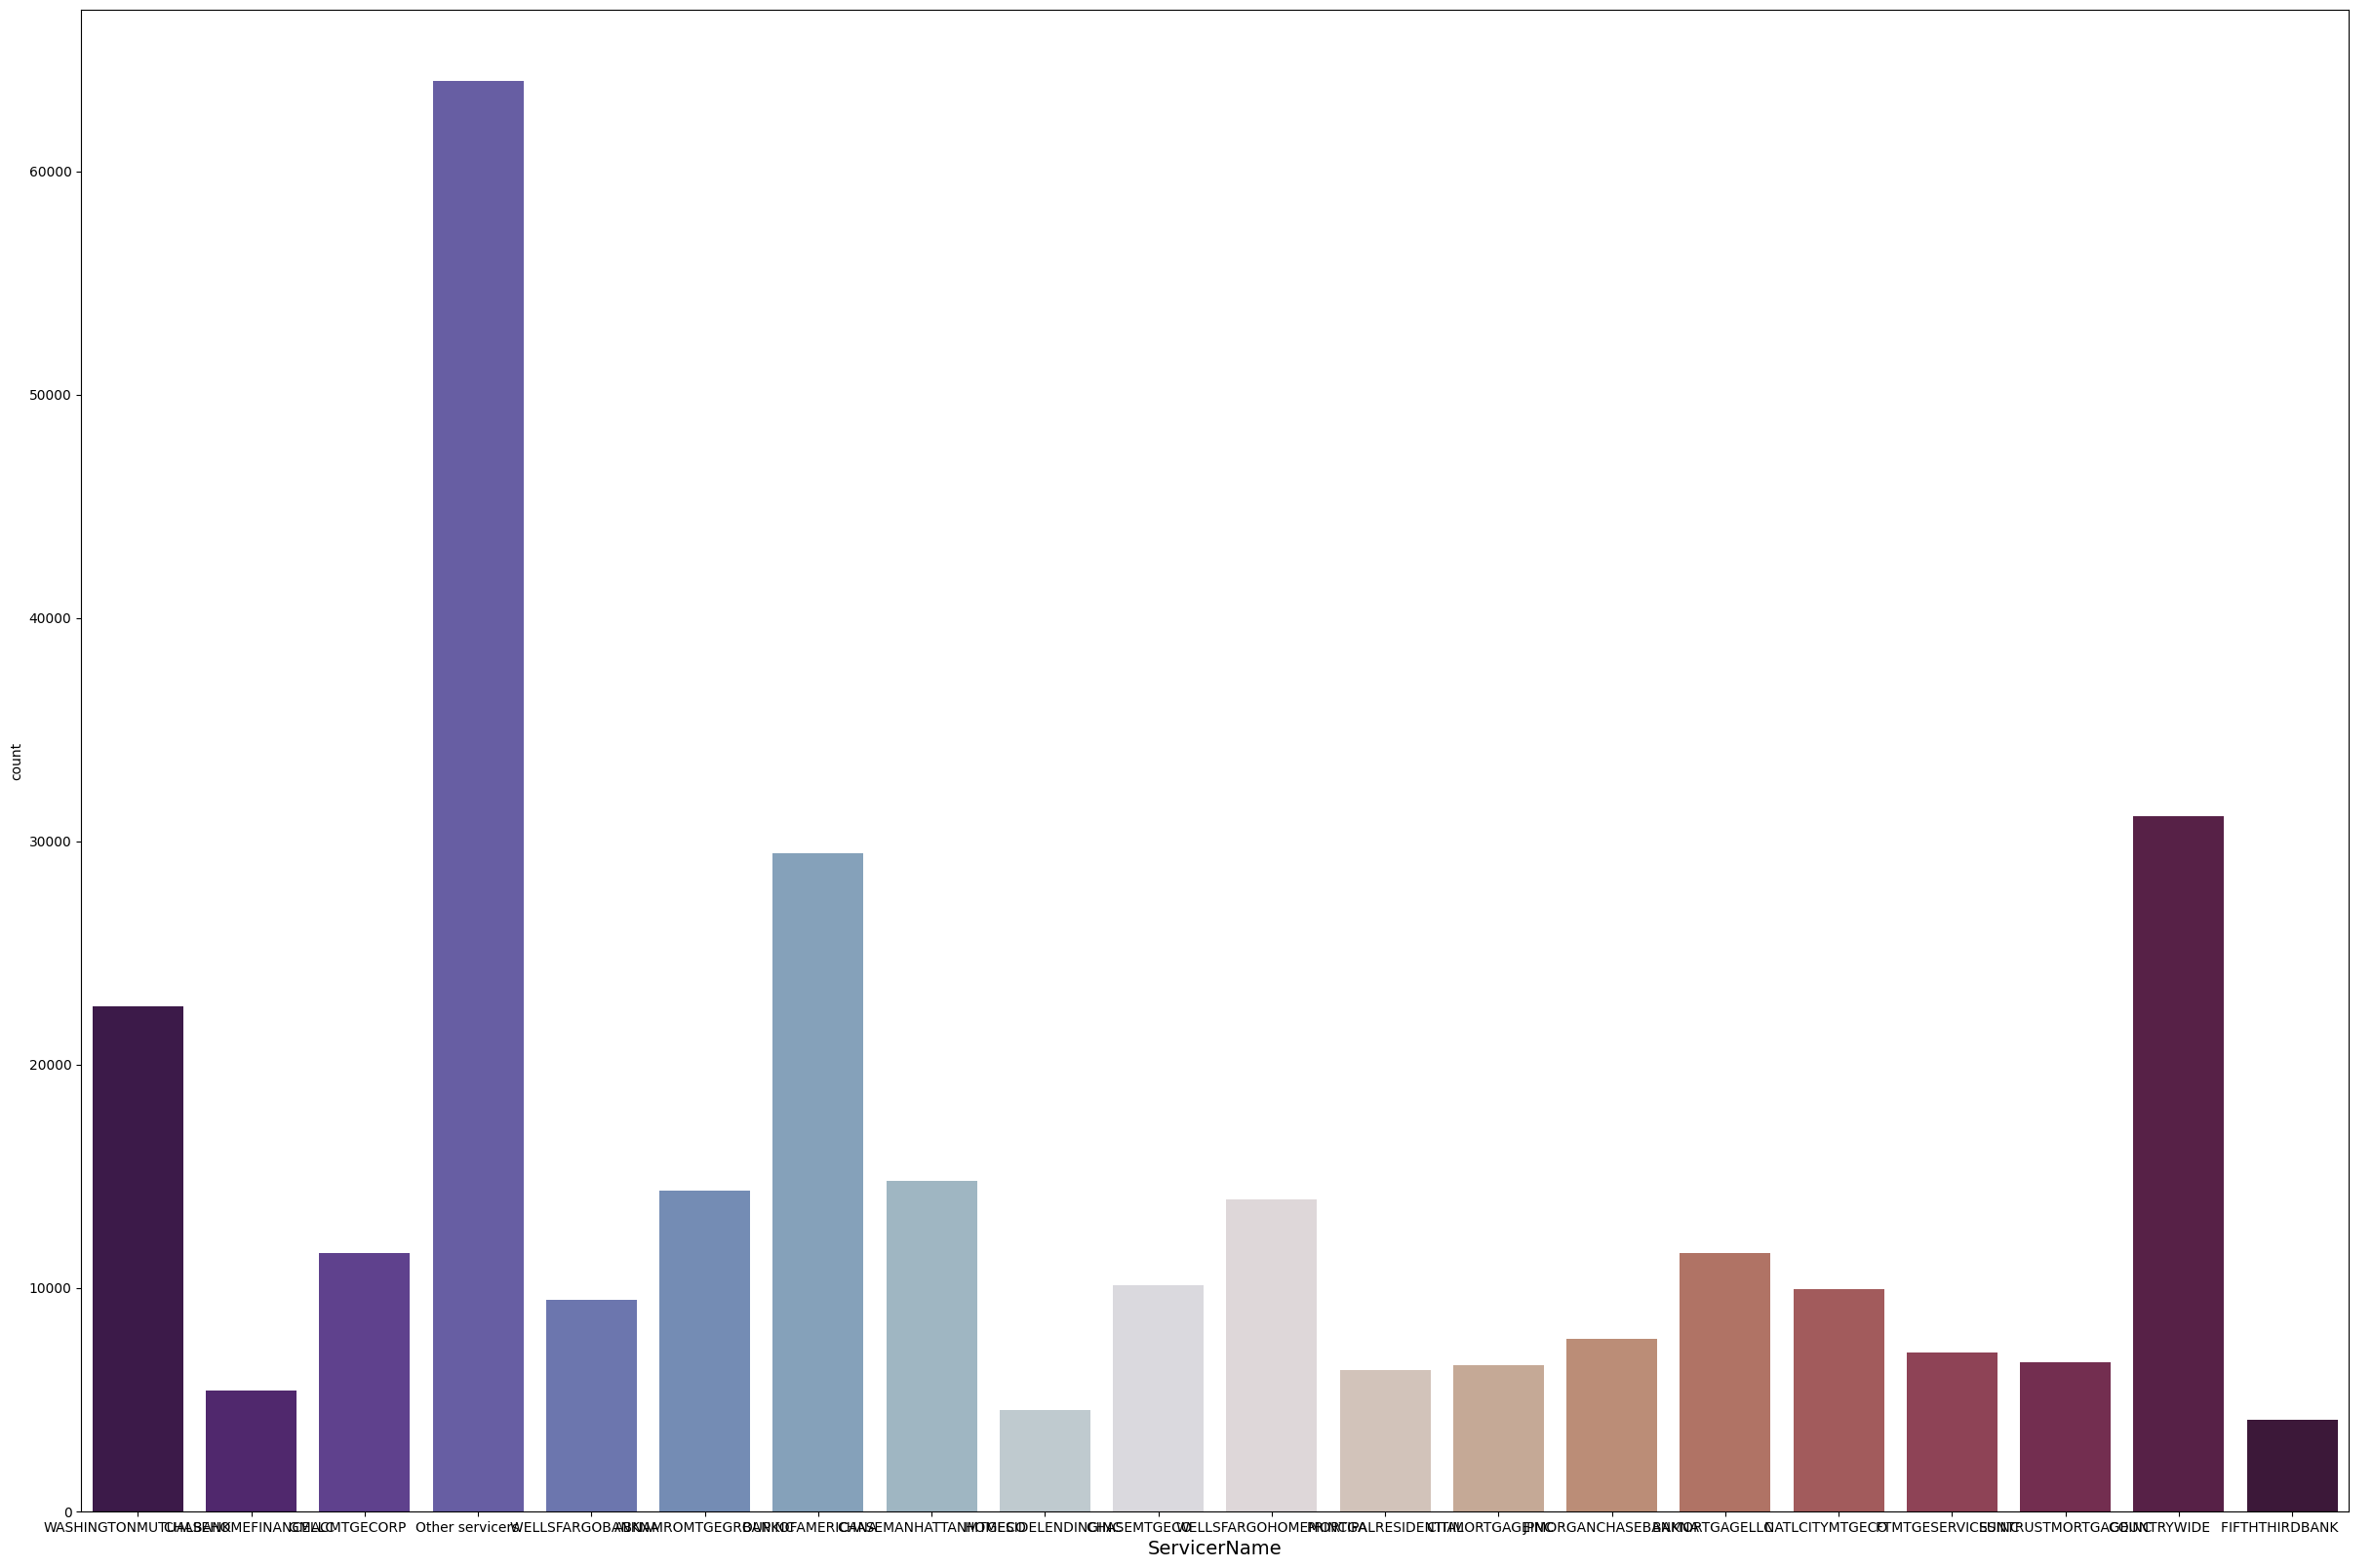

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(x='ServicerName',data=data,palette="twilight_shifted")
plt.xlabel("ServicerName",fontsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


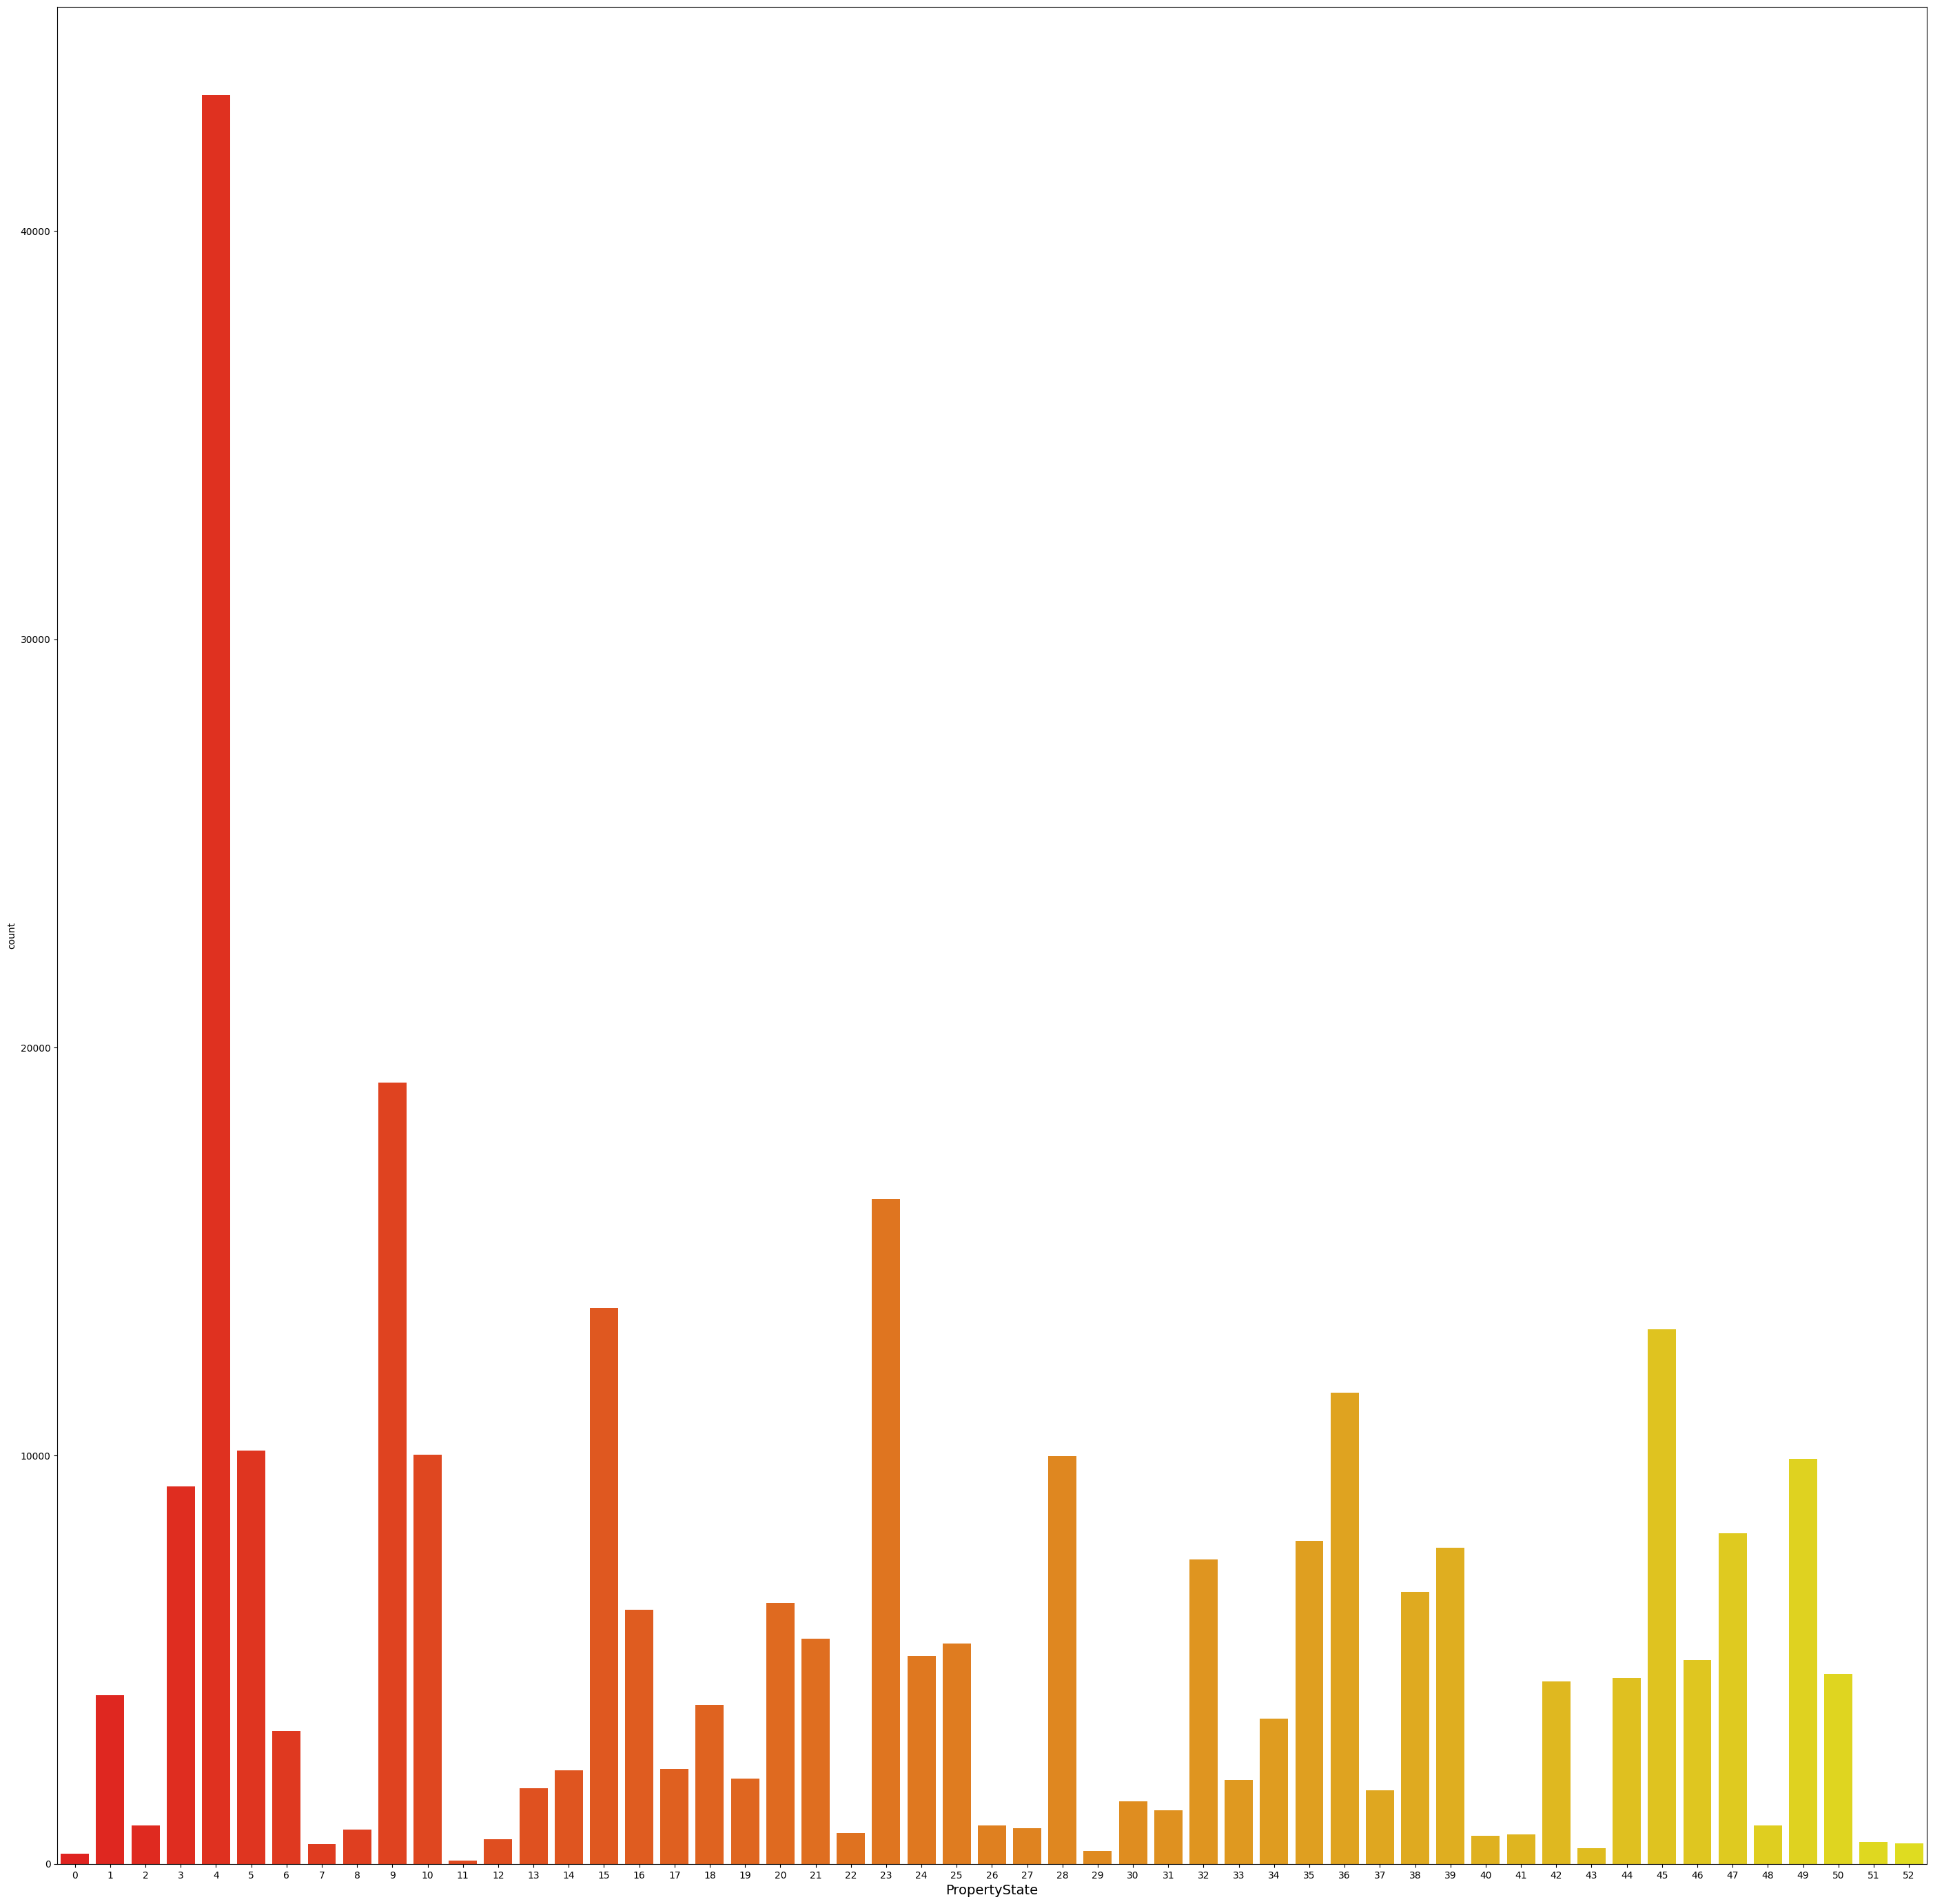

In [ ]:
plt.figure(figsize=(35,35))
sns.countplot(x='PropertyState',data=data,palette="autumn")
plt.xlabel("PropertyState",fontsize=14)
plt.show()

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


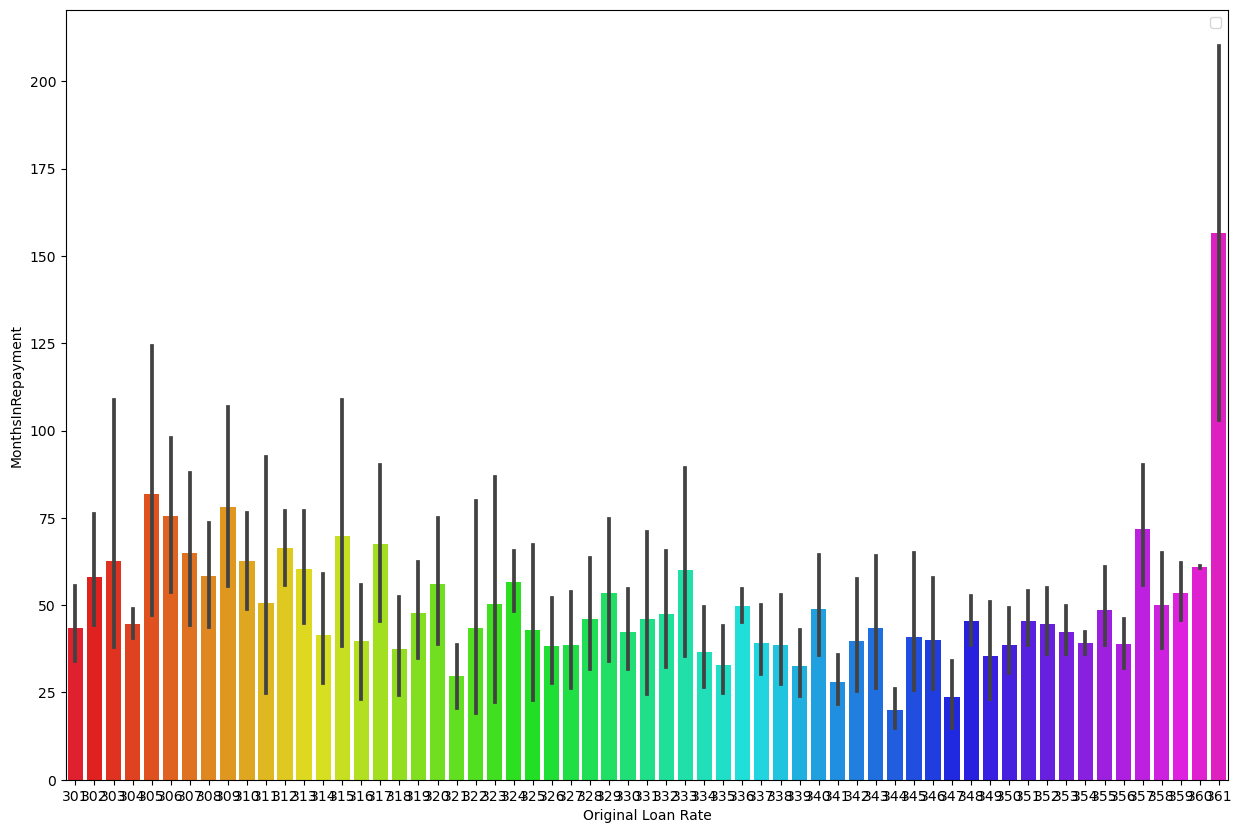

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot('OrigLoanTerm','MonthsInRepayment',data=data,palette='gist_rainbow')
plt.xlabel('Original Loan Rate')
plt.legend()
plt.show()

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


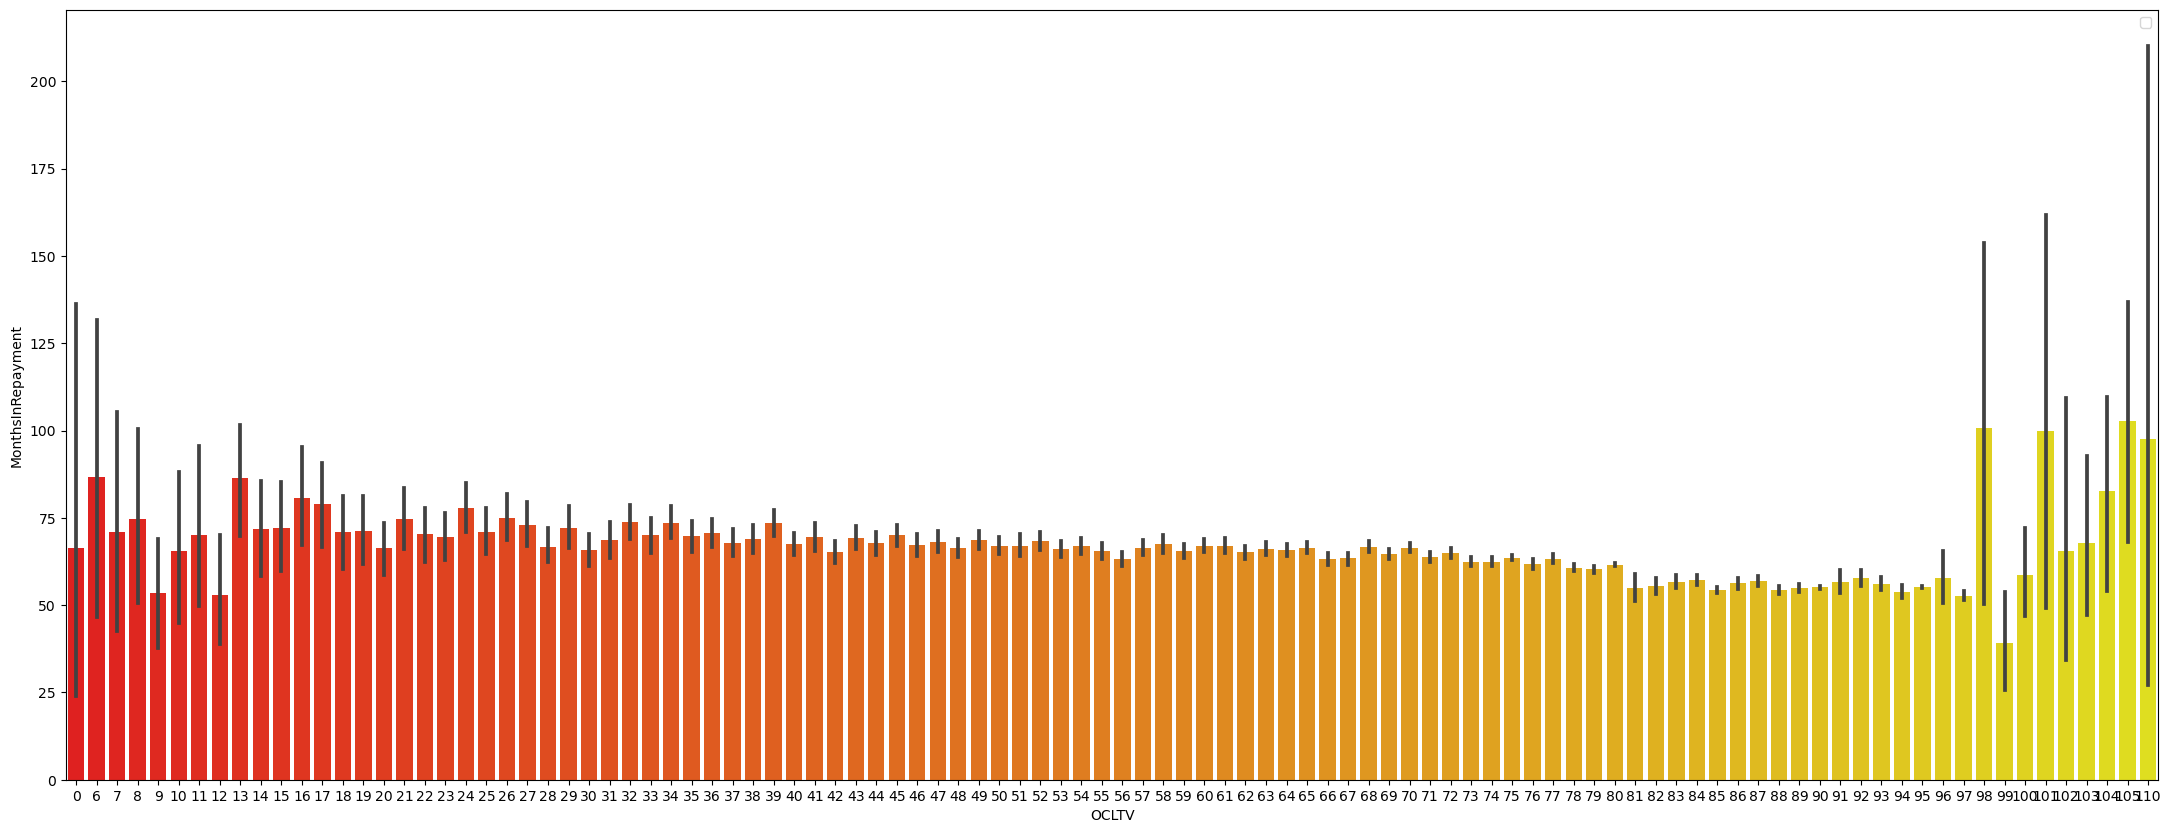

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot('OCLTV','MonthsInRepayment',data=data,palette='autumn')
plt.xlabel('OCLTV')
plt.legend()
plt.show()

In [ ]:
#convert LoanPurpose and FirstTimeHomebuyer to numerical data by get_dummies function
encoded_data = pd.get_dummies(data['LoanPurpose'], prefix='LoanPurpose')
encoded_data2 = pd.get_dummies(data['FirstTimeHomebuyer'], prefix='FirstTimeHomebuyer')
data_temp = pd.concat([data, encoded_data], axis=1)
data=pd.concat([data_temp,encoded_data2], axis =1)
data.drop('LoanPurpose', axis=1,inplace=True)
data.drop('FirstTimeHomebuyer', axis =1 , inplace=True)

#Feature

In [ ]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MSA', 'MIP',
       'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'FirstTimeHomebuyer_N',
       'FirstTimeHomebuyer_X', 'FirstTimeHomebuyer_Y'],
      dtype='object')

In [ ]:
# Eliminating useless features
data.drop(['FirstTimeHomebuyer_X','FirstTimeHomebuyer_N','ServicerName','SellerName','NumBorrowers','PropertyType','PropertyState','ProductType','PPM','Channel','Occupancy','MSA','MaturityDate','FirstPaymentDate'], inplace=True,axis=1)


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,FirstPaymentDate,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,...,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_N,FirstTimeHomebuyer_X,FirstTimeHomebuyer_Y
0,0,1999-02-01,2029-01-01,16974,25,1,O,89,27,117000,...,WASHINGTONMUTUALBANK,0,0,52,0,0,1,1,0,0
1,0,1999-02-01,2029-01-01,19740,0,1,O,73,17,109000,...,CHASEHOMEFINANCELLC,0,0,144,0,1,0,1,0,0
2,0,1999-02-01,2029-01-01,29940,0,1,O,75,16,88000,...,WASHINGTONMUTUALBANK,0,0,67,0,1,0,1,0,0
3,0,1999-02-01,2029-01-01,31084,0,1,O,76,14,160000,...,GMACMTGECORP,0,0,35,0,1,0,1,0,0
4,0,1999-02-01,2029-01-01,35644,0,1,O,78,18,109000,...,GMACMTGECORP,0,0,54,0,1,0,1,0,0


In [ ]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore                 0
FirstPaymentDate            0
MaturityDate                0
MSA                         0
MIP                         0
Units                       0
Occupancy                   0
OCLTV                       0
DTI                         0
OrigUPB                     0
LTV                         0
OrigInterestRate            0
Channel                     0
PPM                         0
ProductType                 0
PropertyState               0
PropertyType                0
OrigLoanTerm                0
NumBorrowers                0
SellerName              24994
ServicerName                0
EverDelinquent              0
MonthsDelinquent            0
MonthsInRepayment           0
LoanPurpose_C               0
LoanPurpose_N               0
LoanPurpose_P               0
FirstTimeHomebuyer_N        0
FirstTimeHomebuyer_X        0
FirstTimeHomebuyer_Y        0
dtype: int64

In [ ]:
#check nulls precentage to be more sure
data.isnull().sum()*100/data.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditScore             0.000000
FirstPaymentDate        0.000000
MaturityDate            0.000000
MSA                     0.000000
MIP                     0.000000
Units                   0.000000
Occupancy               0.000000
OCLTV                   0.000000
DTI                     0.000000
OrigUPB                 0.000000
LTV                     0.000000
OrigInterestRate        0.000000
Channel                 0.000000
PPM                     0.000000
ProductType             0.000000
PropertyState           0.000000
PropertyType            0.000000
OrigLoanTerm            0.000000
NumBorrowers            0.000000
SellerName              8.575713
ServicerName            0.000000
EverDelinquent          0.000000
MonthsDelinquent        0.000000
MonthsInRepayment       0.000000
LoanPurpose_C           0.000000
LoanPurpose_N           0.000000
LoanPurpose_P           0.000000
FirstTimeHomebuyer_N    0.000000
FirstTimeHomebuyer_X    0.000000
FirstTimeHomebuyer_Y    0.000000
dtype: flo

In [ ]:
data.drop(['PostalCode','LoanSeqNum'], axis=1,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.info()
#no more categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CreditScore           291451 non-null  int64         
 1   FirstPaymentDate      291451 non-null  datetime64[ns]
 2   MaturityDate          291451 non-null  datetime64[ns]
 3   MSA                   291451 non-null  object        
 4   MIP                   291451 non-null  int64         
 5   Units                 291451 non-null  int64         
 6   Occupancy             291451 non-null  object        
 7   OCLTV                 291451 non-null  int64         
 8   DTI                   291451 non-null  int64         
 9   OrigUPB               291451 non-null  int64         
 10  LTV                   291451 non-null  int64         
 11  OrigInterestRate      291451 non-null  float64       
 12  Channel               291451 non-null  int64         
 13 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_Y
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,0
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,0
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,0
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,0
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,0


In [ ]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_Y
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291,0.199042,0.377545,0.423413,0.100470
std,68.408791,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599,0.399280,0.484774,0.494100,0.300626
min,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,675.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000
50%,717.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000
75%,753.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000,0.000000,1.000000,1.000000,0.000000
max,849.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000,1.000000,1.000000,1.000000,1.000000


#BIVARIATE ANALYSIS

#CORRELATION:

In [ ]:
data.corr()
#draw the correlation matrix to see the relationship between variables

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_Y
CreditScore,1.000000,-0.164376,0.002808,-0.190848,-0.098740,0.003770,-0.191080,-0.119472,-0.008075,-0.207204,-0.150266,-0.005127,0.012689,-0.005176,-0.005175,-0.049881
MIP,-0.164376,1.000000,-0.042111,0.694789,0.111603,0.006729,0.695888,0.124544,0.014834,0.059993,0.051204,-0.087802,-0.326432,-0.156375,0.417212,0.264119
Units,0.002808,-0.042111,1.000000,-0.046133,0.012887,0.043827,-0.046032,0.074070,0.005348,0.010163,-0.004573,0.025594,0.002475,0.020492,-0.022105,-0.011075
OCLTV,-0.190848,0.694789,-0.046133,1.000000,0.114853,0.106273,0.999470,0.095268,0.018560,0.065528,0.059811,-0.094299,-0.310735,-0.142061,0.390483,0.242708
DTI,-0.098740,0.111603,0.012887,0.114853,1.000000,0.063640,0.114468,0.105216,0.028005,0.062109,0.040830,-0.007732,-0.003264,-0.063646,0.065082,0.056925
OrigUPB,0.003770,0.006729,0.043827,0.106273,0.063640,1.000000,0.105722,-0.128563,-0.008008,-0.067605,-0.067243,-0.211698,-0.043511,0.014162,0.021267,-0.031918
LTV,-0.191080,0.695888,-0.046032,0.999470,0.114468,0.105722,1.000000,0.095520,0.018477,0.065735,0.059930,-0.094596,-0.310805,-0.141873,0.390355,0.242869
OrigInterestRate,-0.119472,0.124544,0.074070,0.095268,0.105216,-0.128563,0.095520,1.000000,0.010794,0.060418,0.051706,-0.120378,-0.013966,-0.015458,0.026452,0.038733
OrigLoanTerm,-0.008075,0.014834,0.005348,0.018560,0.028005,-0.008008,0.018477,0.010794,1.000000,0.010348,0.006567,0.016591,0.016022,-0.032148,0.018593,0.014915
EverDelinquent,-0.207204,0.059993,0.010163,0.065528,0.062109,-0.067605,0.065735,0.060418,0.010348,1.000000,0.420048,0.232497,0.017766,0.004577,-0.018847,0.002109


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


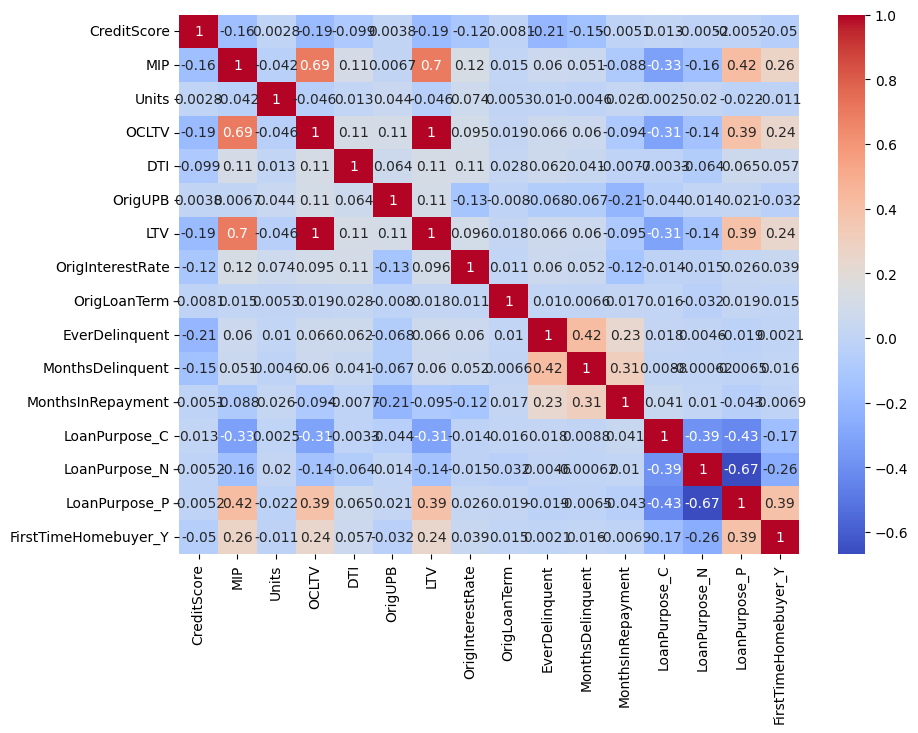

In [ ]:
#sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
#show the correlation between data's features using heat map


# Generate correlation matrix
corr_matrix = data.corr()

# Set figure size
plt.figure(figsize=(10,7))

# Create heatmap with correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

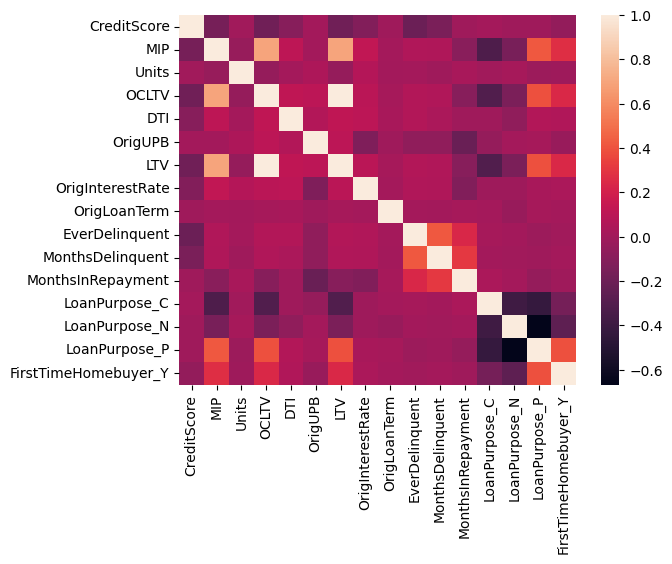

In [ ]:
sns.heatmap(data.corr(),cmap='rocket')

#BOX PLOT: (UNIVARIATE ANALYSIS)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

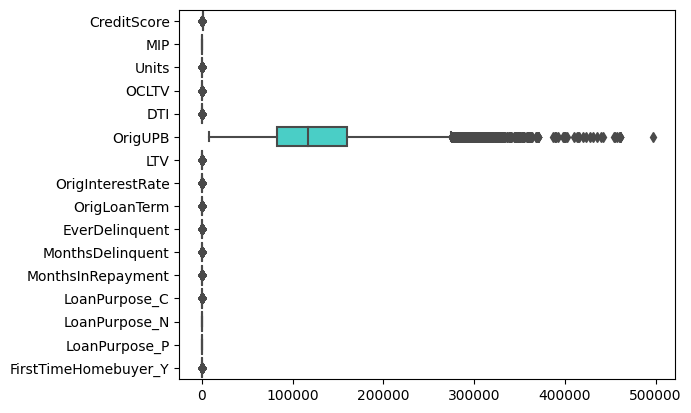

In [ ]:
sns.boxplot(data=data,palette='rainbow',orient='h')
#box plot to all features to show outliers

In [ ]:
#view individual boxplots to visualise outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


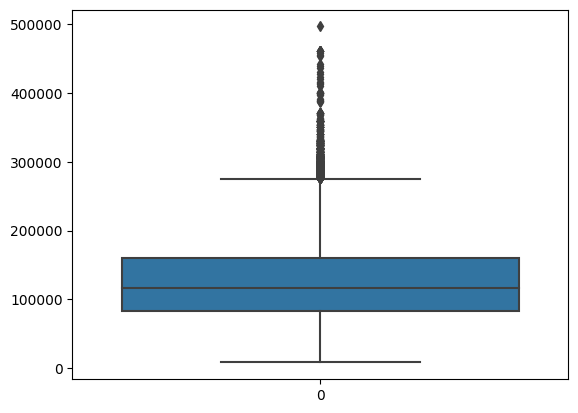

In [ ]:
draw_boxplot('OrigUPB')

In [ ]:
#drop outliers
upp,low=handle_outlier(data['OrigUPB'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['OrigUPB']=np.where(data['OrigUPB']>upp,upp,data['OrigUPB'])
data['OrigUPB']=np.where(data['OrigUPB']<low,low,data['OrigUPB'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


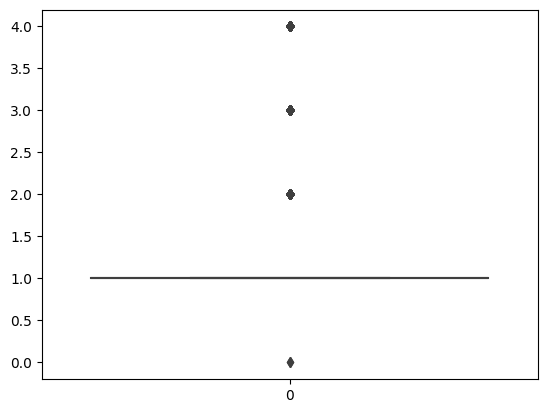

In [ ]:
draw_boxplot('Units')

In [ ]:
upper,lower=handle_outlier(data['Units'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['Units']=np.where(data['Units']>upper,upper,data['Units'])
data['Units']=np.where(data['Units']<lower,lower,data['Units'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


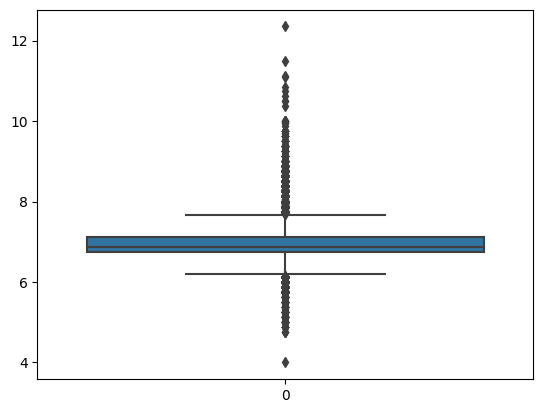

In [ ]:
draw_boxplot('OrigInterestRate')

In [ ]:
uppero,lowero=handle_outlier(data['OrigInterestRate'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['OrigInterestRate']=np.where(data['OrigInterestRate']>uppero,uppero,data['OrigInterestRate'])
data['OrigInterestRate']=np.where(data['OrigInterestRate']<lowero,lowero,data['OrigInterestRate'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#checking for duplicates values to drop them
duplicate=data.duplicated()
print(duplicate.sum())

48


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data=data.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
duplicate=data.duplicated()
print(duplicate.sum())

0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**Line Plot**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

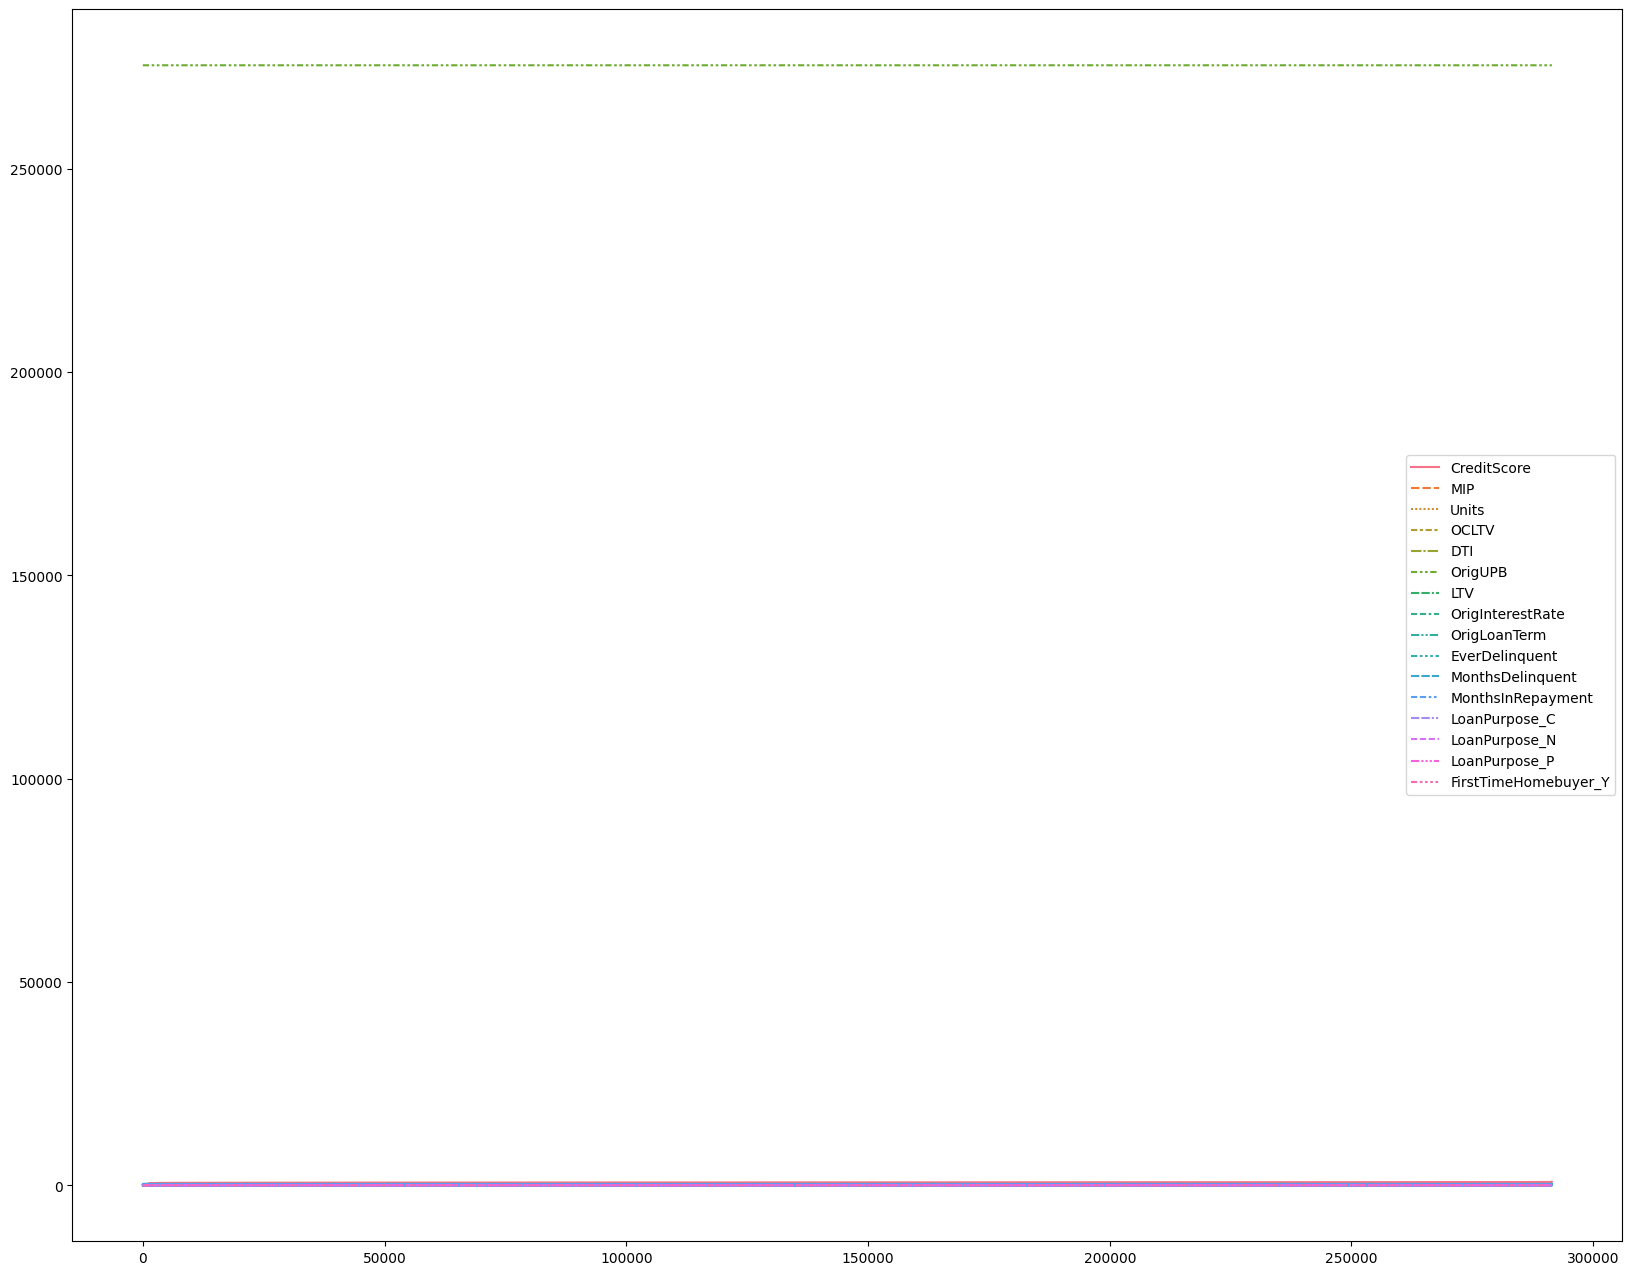

In [ ]:
plt.figure(figsize=(20,16))
sns.lineplot(data=data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


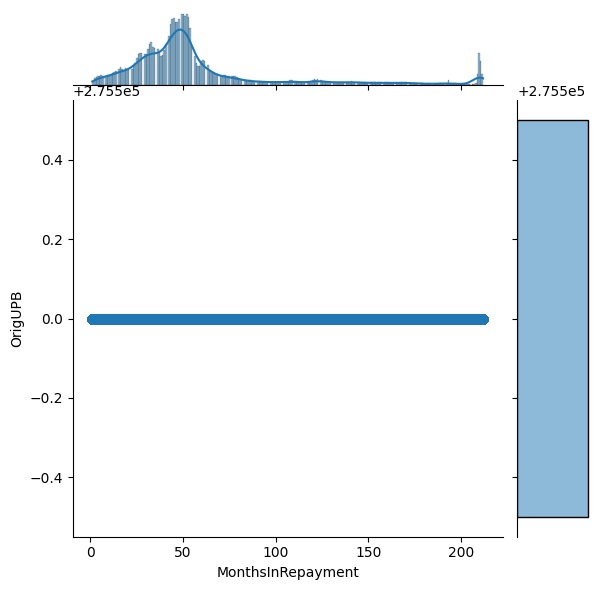

In [ ]:
draw_join_plot(data['MonthsInRepayment'],data['OrigUPB'])

In [ ]:
data['EverDelinquent'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 1])

In [ ]:
data['EverDelinquent'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    231680
1     57633
Name: EverDelinquent, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


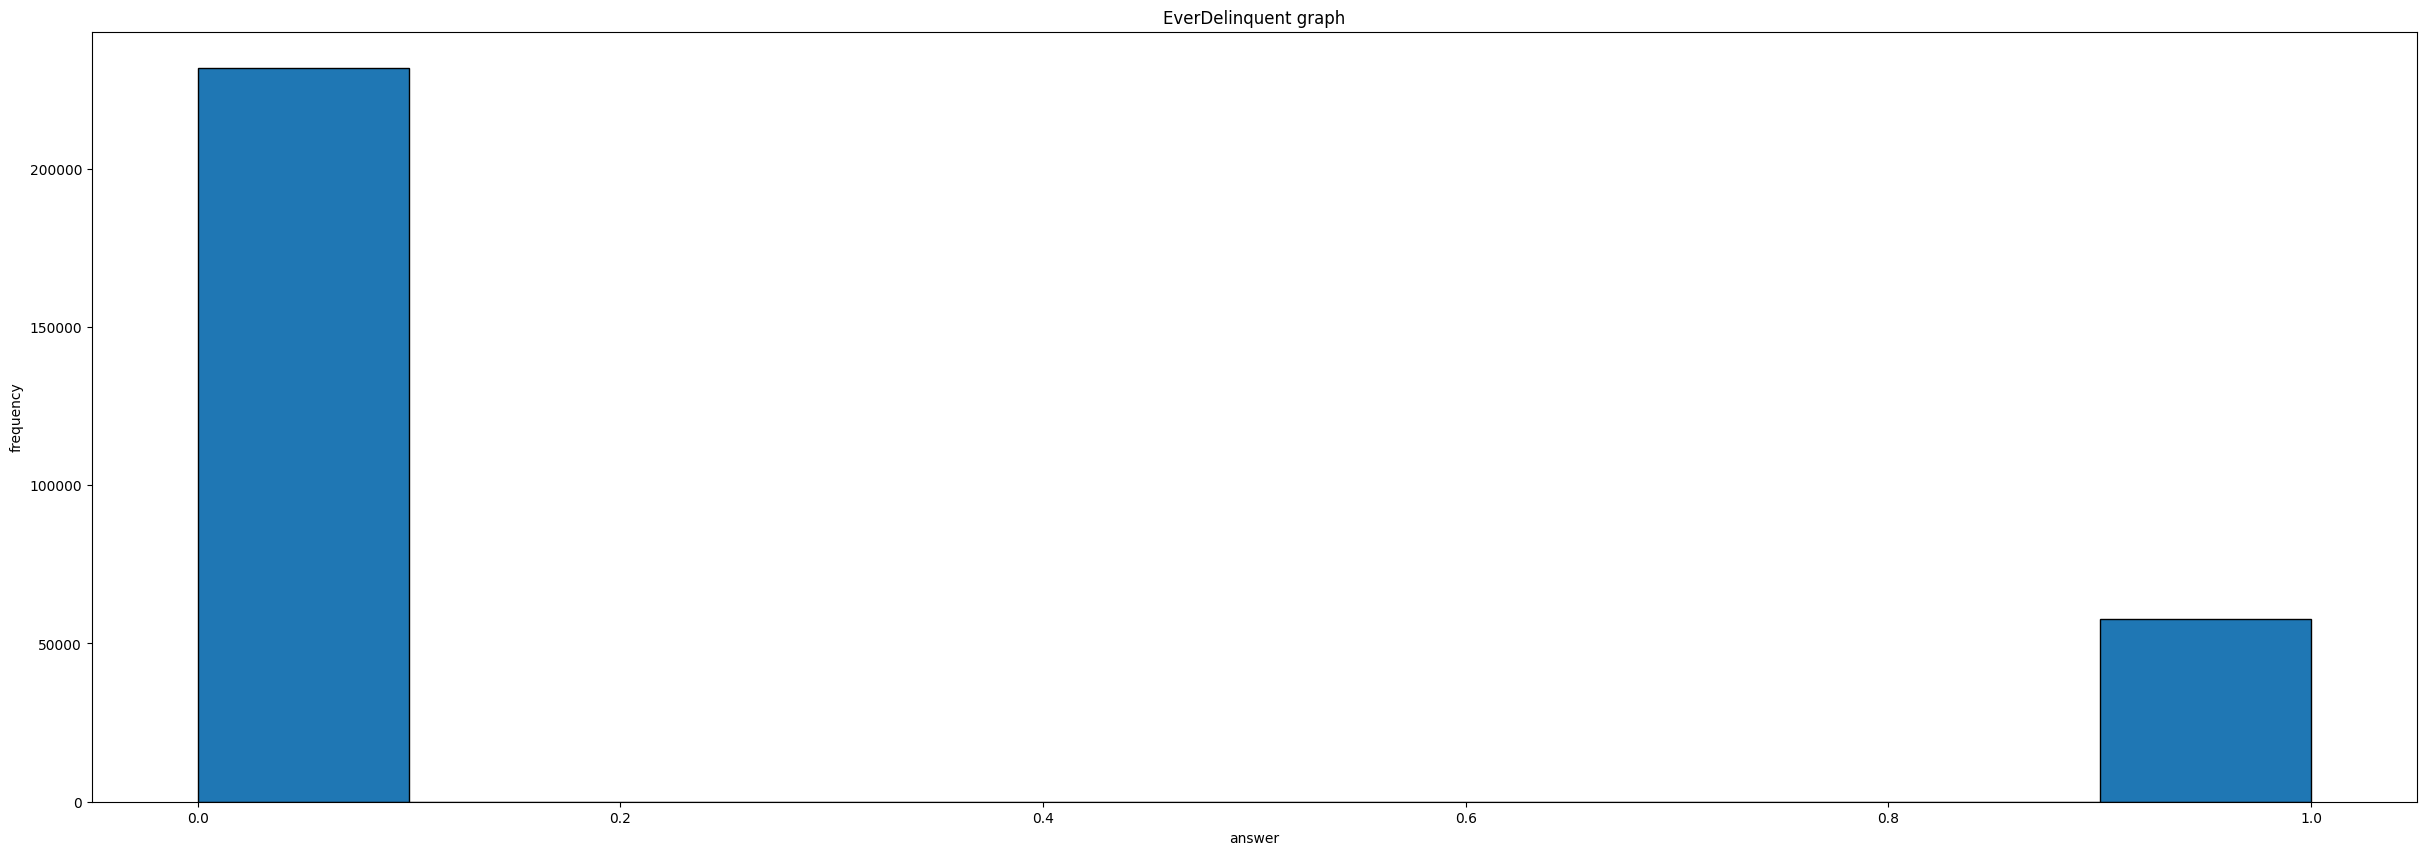

In [ ]:
draw_histogram('EverDelinquent','EverDelinquent graph','answer','frequency')

#BarGraph

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


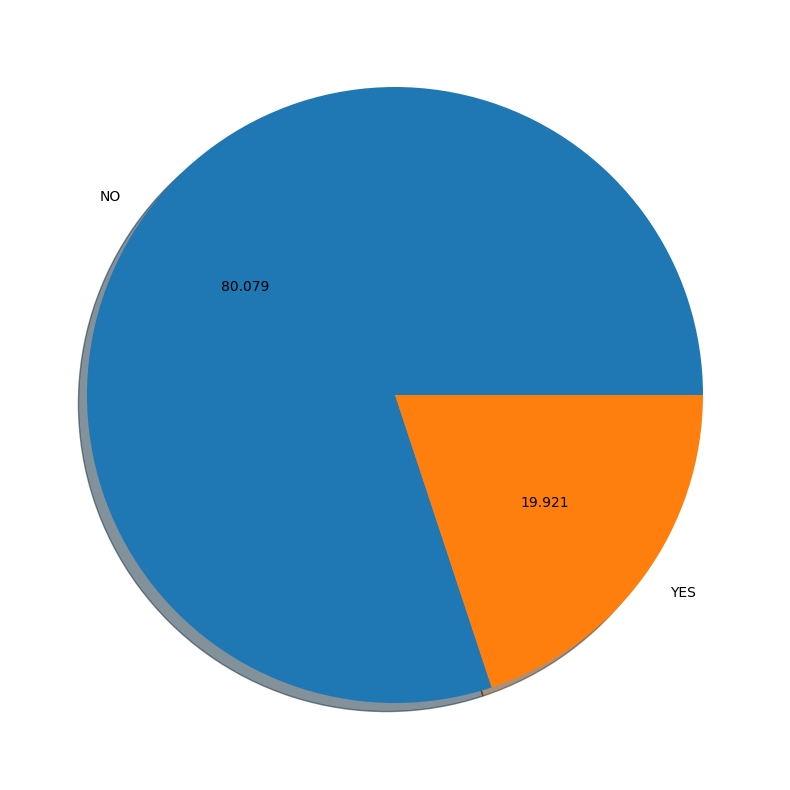

In [ ]:
labels=['NO','YES']
draw_piechart('EverDelinquent',labels)

#LinePlot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-89-19143cf349ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


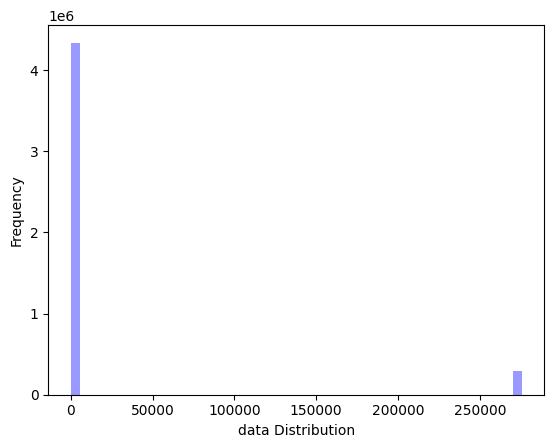

In [ ]:
ax = sns.distplot(data,
                  kde=False,
                  color='blue')
ax.set(xlabel='data Distribution', ylabel='Frequency')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-88-c94ac66c5cab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


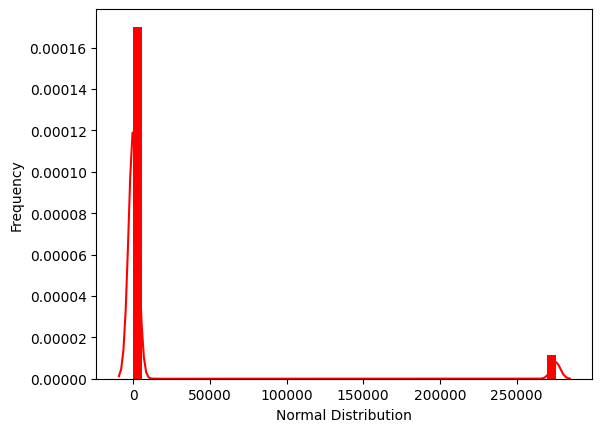

In [ ]:
import scipy.stats as stats
ax = sns.distplot(data,
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()

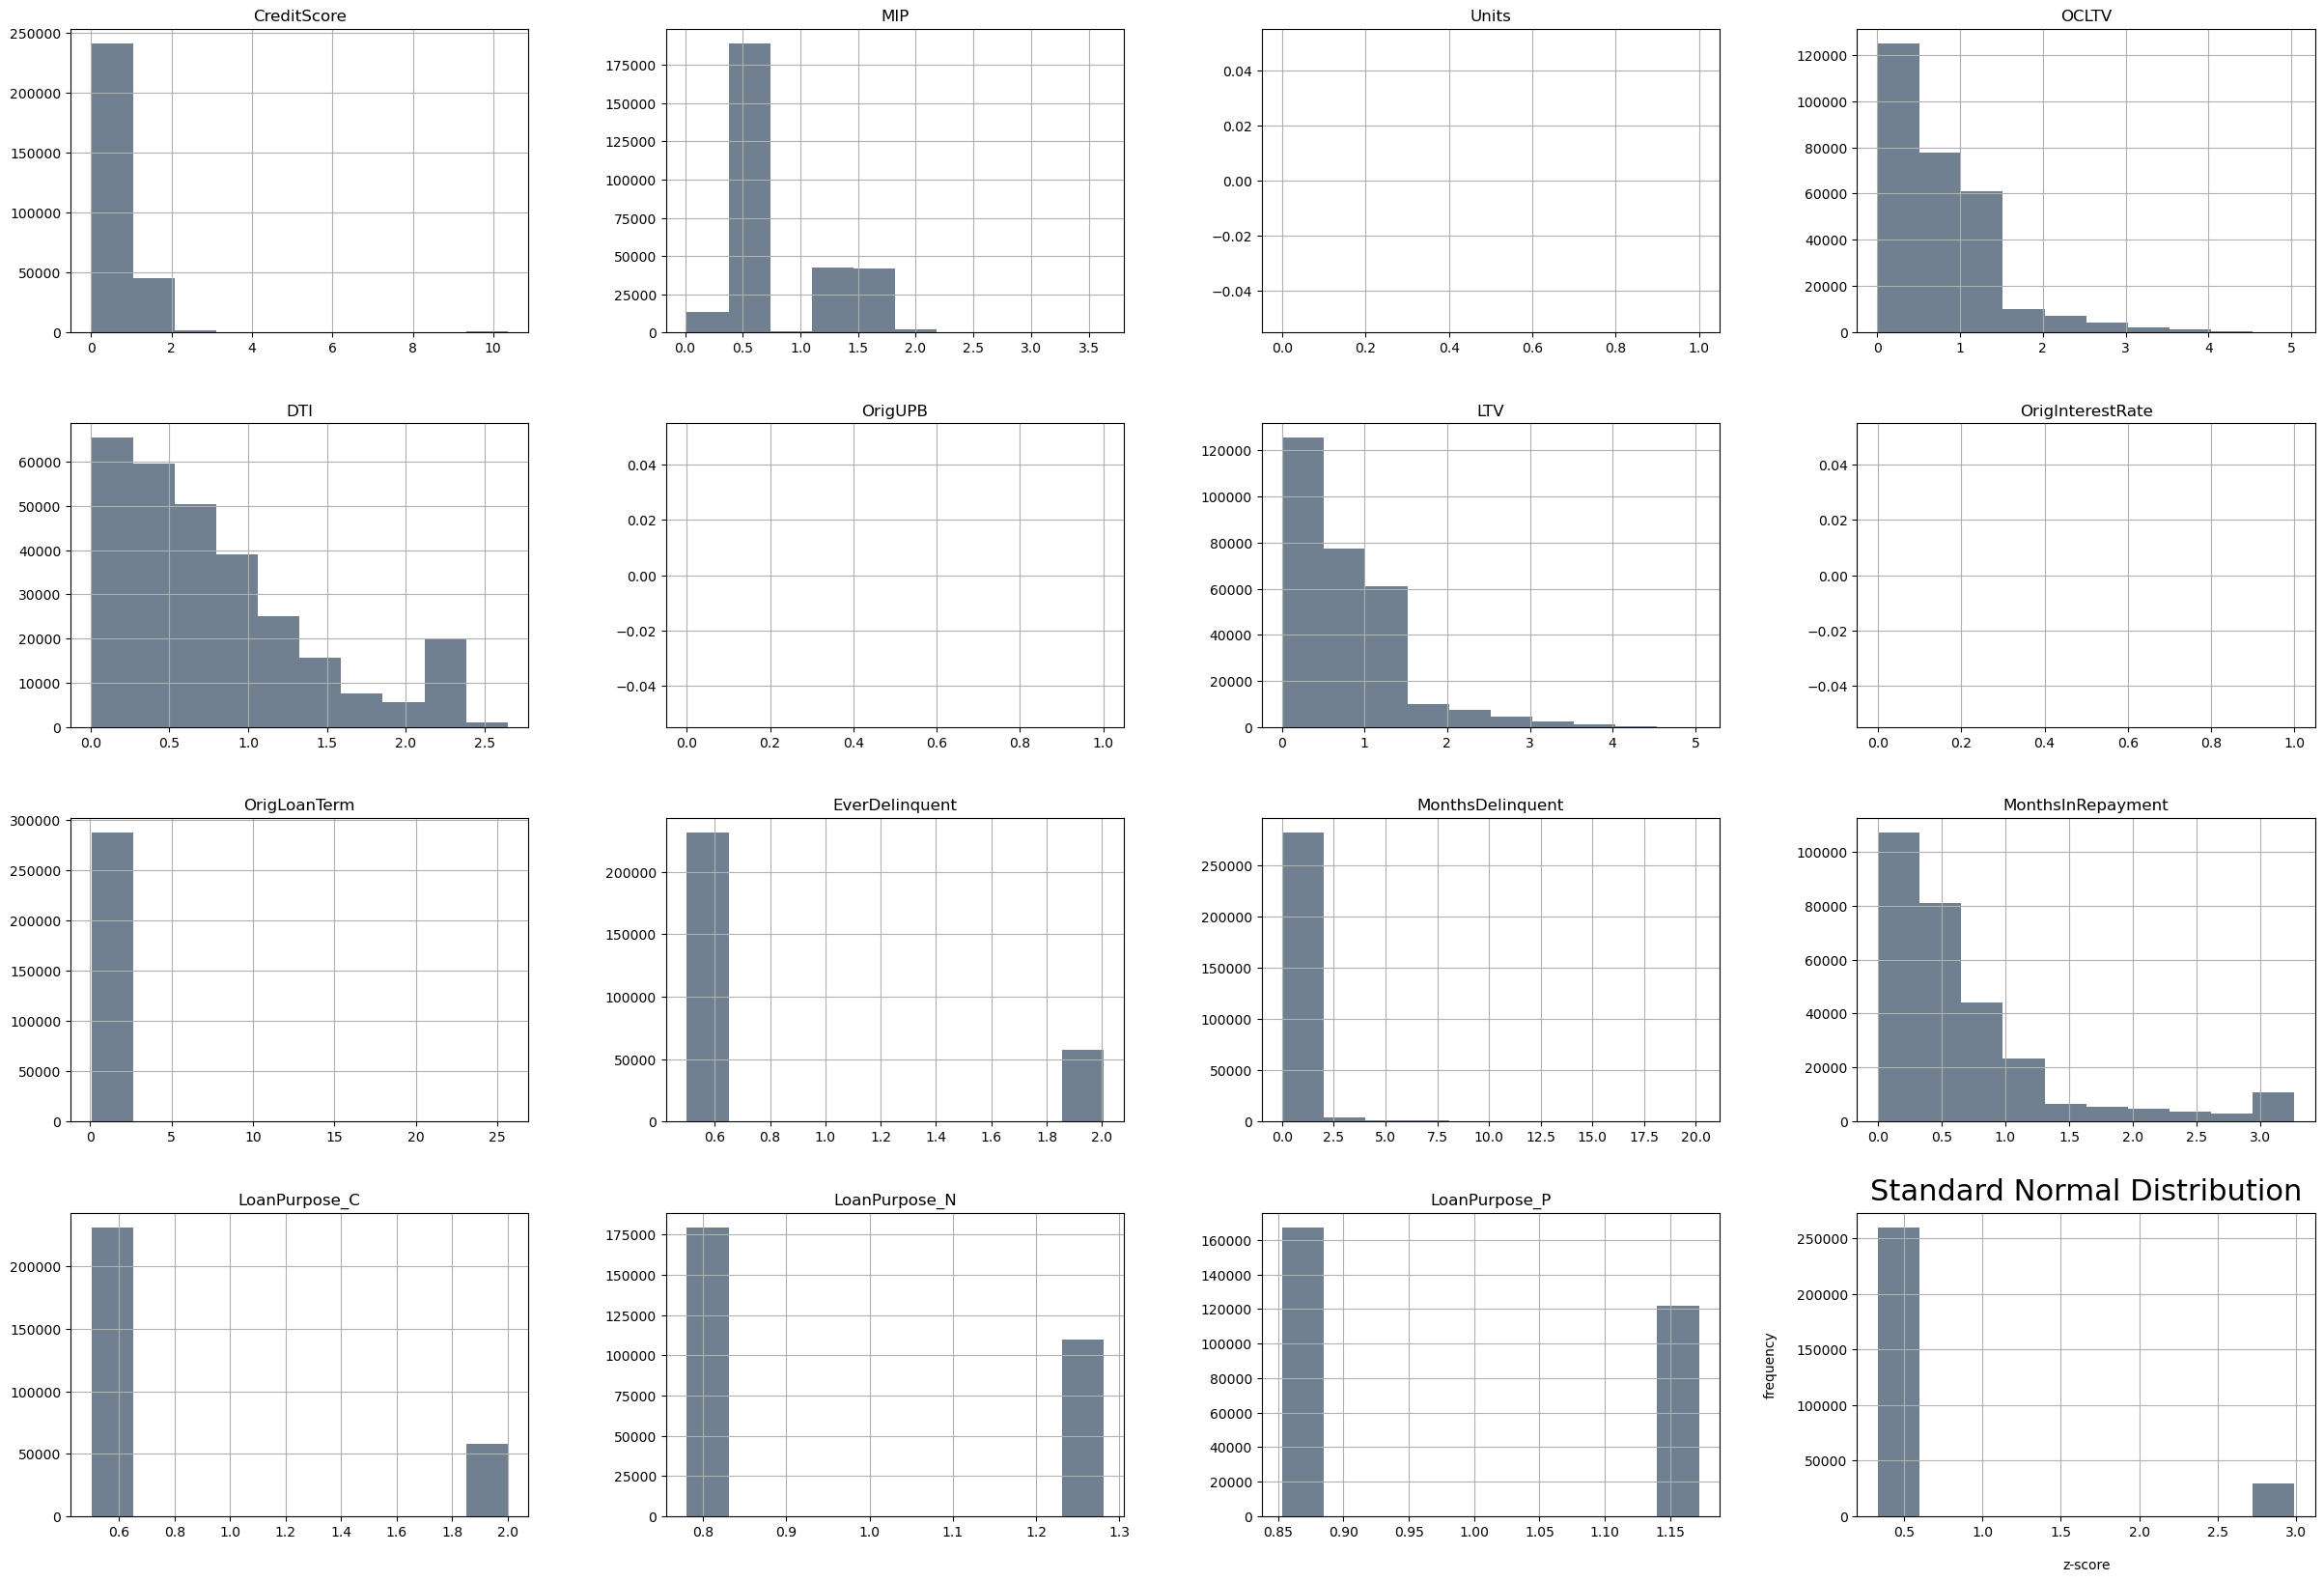

In [ ]:
# view Standard Normal Distribution for all features
z_score.hist(color='slategray',figsize=(30,20))
plt.title("Standard Normal Distribution", y=1.015, fontsize=22)
plt.xlabel("z-score", labelpad=14)
plt.ylabel("frequency", labelpad=14);


In [ ]:
#calculating z score to know how far from mean value (by calculating standard deviation)
#help you to know more about data
from scipy import stats
z_score=np.abs(stats.zscore(data))
print (z_score)

        CreditScore       MIP  Units     OCLTV       DTI  OrigUPB       LTV  \
0         10.362576  1.251897    NaN  0.793001  0.231585      NaN  0.795063   
1         10.362576  0.727358    NaN  0.255700  0.989403      NaN  0.254395   
2         10.362576  0.727358    NaN  0.124612  1.065184      NaN  0.123213   
3         10.362576  0.727358    NaN  0.059069  1.216748      NaN  0.057622   
4         10.362576  0.727358    NaN  0.072019  0.913621      NaN  0.073561   
...             ...       ...    ...       ...       ...      ...       ...   
291446     1.902391  0.727358    NaN  1.107769  0.147323      NaN  1.107079   
291447     1.917010  0.727358    NaN  0.255700  2.277692      NaN  0.254395   
291448     1.917010  0.727358    NaN  0.255700  0.071541      NaN  0.254395   
291449     1.990103  0.727358    NaN  0.203107  1.814521      NaN  0.204743   
291450     2.048577  0.727358    NaN  1.959838  0.080022      NaN  1.959764   

        OrigInterestRate  OrigLoanTerm  EverDelinqu

In [ ]:
#that make a distribution of the data become clear

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Data

In [ ]:
data.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_Y
0,0,25,1.0,89,27,275500.0,89,7.6875,360,0,0,52,0,0,1,0
1,0,0,1.0,73,17,275500.0,73,7.6875,360,0,0,144,0,1,0,0
2,0,0,1.0,75,16,275500.0,75,7.6875,360,0,0,67,0,1,0,0
3,0,0,1.0,76,14,275500.0,76,7.6875,360,0,0,35,0,1,0,0
4,0,0,1.0,78,18,275500.0,78,7.6875,360,0,0,54,0,1,0,0


In [ ]:
import pandas as pd

def calculate_credit_range(row):
    if row['CreditScore'] >= 750:
        return 'excellent'
    elif row['CreditScore'] >= 700:
        return 'good'
    elif row['CreditScore'] >= 650:
        return 'fair'
    else:
        return 'poor'

def calculate_ltv_range(row):
    if row['LTV'] < 75:
        return 'low'
    elif row['LTV'] >= 75 and row['LTV'] < 80:
        return 'medium'
    elif row['LTV'] >= 80 and row['LTV'] < 90:
        return 'high'
    else:
        return 'very high'

def calculate_repay_range(row):
    if row['OrigInterestRate'] < 4:
        return 'low'
    elif row['OrigInterestRate'] >= 4 and row['OrigInterestRate'] < 6:
        return 'medium'
    else:
        return 'high'

data['CreditRange'] = data.apply(calculate_credit_range, axis=1)
data['LTVRange'] = data.apply(calculate_ltv_range, axis=1)
data['RepayRange'] = data.apply(calculate_repay_range, axis=1)


# convert categorical ranges to numerical features
credit_range_dummies = pd.get_dummies(data['CreditRange'], prefix='CreditRange')
label_encoding('LTVRange')
repay_range_dummies = pd.get_dummies(data['RepayRange'], prefix='RepayRange')

# concatenate the newly created numerical features to the original data
raw_data = pd.concat([data, credit_range_dummies, repay_range_dummies], axis=1)

# drop the original categorical ranges
raw_data = raw_data.drop(['CreditRange', 'RepayRange'], axis=1)


In [ ]:
raw_data.isnull().sum()

CreditScore              0
MIP                      0
Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
OrigLoanTerm             0
EverDelinquent           0
MonthsDelinquent         0
MonthsInRepayment        0
LoanPurpose_C            0
LoanPurpose_N            0
LoanPurpose_P            0
FirstTimeHomebuyer_Y     0
LTVRange                 0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
CreditRange_poor         0
RepayRange_high          0
dtype: int64

In [ ]:
data.drop(["MonthsInRepayment",'MonthsDelinquent'],axis=1,inplace=True)
raw_data.drop(["MonthsInRepayment",'MonthsDelinquent'],axis=1,inplace=True)
#because they are strongly corrolated with the target and causes data leakage (over fitting)

In [ ]:
#Splitting data to features and label data

In [ ]:
raw_data.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'FirstTimeHomebuyer_Y', 'LTVRange',
       'CreditRange_excellent', 'CreditRange_fair', 'CreditRange_good',
       'CreditRange_poor', 'RepayRange_high'],
      dtype='object')

In [ ]:
x=raw_data.drop(['EverDelinquent'], axis=1)
y=raw_data['EverDelinquent']

In [ ]:
x.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'LoanPurpose_C', 'LoanPurpose_N',
       'LoanPurpose_P', 'FirstTimeHomebuyer_Y', 'LTVRange',
       'CreditRange_excellent', 'CreditRange_fair', 'CreditRange_good',
       'CreditRange_poor', 'RepayRange_high'],
      dtype='object')

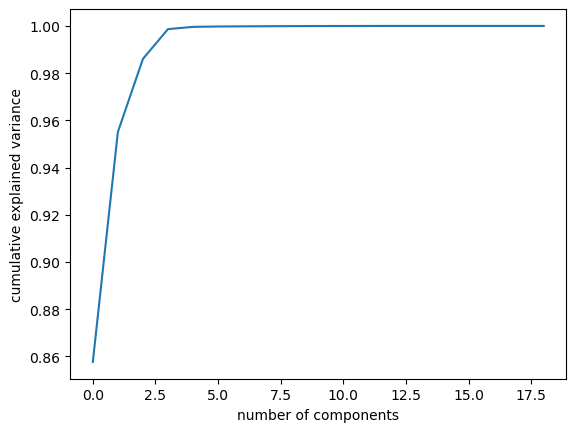

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [ ]:
#Scalling feature data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stat_data = scaler.fit_transform(x)


In [ ]:
x.isnull().sum()

CreditScore              0
MIP                      0
Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
OrigLoanTerm             0
LoanPurpose_C            0
LoanPurpose_N            0
LoanPurpose_P            0
FirstTimeHomebuyer_Y     0
LTVRange                 0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
CreditRange_poor         0
RepayRange_high          0
dtype: int64

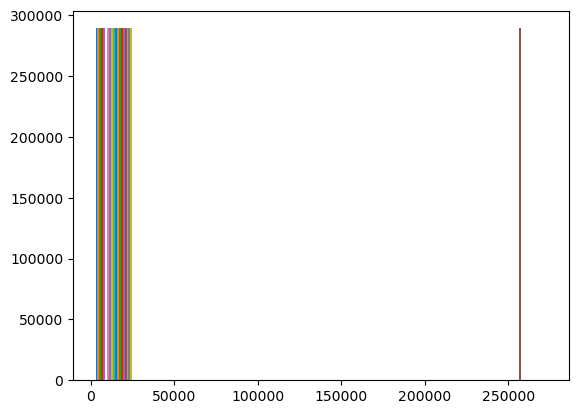

In [ ]:
plt.hist(x)
plt.show()


In [ ]:
!pip install category_encoders
#to install the needed liberary

In [ ]:
x.corr()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_Y,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high
CreditScore,1.000000,-0.164231,NaN,-0.191703,-0.097953,NaN,-0.191939,NaN,-0.008218,0.013017,-0.004887,-0.005742,-0.049522,-0.090964,0.553040,-0.277644,0.173184,-0.605578,NaN
MIP,-0.164231,1.000000,NaN,0.694339,0.110530,NaN,0.695445,NaN,0.014721,-0.326472,-0.154936,0.416634,0.264519,0.610330,-0.178515,0.103281,-0.007442,0.111063,NaN
Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCLTV,-0.191703,0.694339,NaN,1.000000,0.115357,NaN,0.999468,NaN,0.018321,-0.309954,-0.140204,0.388782,0.243288,0.394348,-0.232267,0.128816,0.018069,0.113190,NaN
DTI,-0.097953,0.110530,NaN,0.115357,1.000000,NaN,0.114973,NaN,0.028304,-0.003822,-0.063931,0.065903,0.056466,0.060414,-0.143619,0.092863,0.014413,0.048705,NaN
OrigUPB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LTV,-0.191939,0.695445,NaN,0.999468,0.114973,NaN,1.000000,NaN,0.018237,-0.310022,-0.140010,0.388647,0.243452,0.395537,-0.232337,0.128951,0.017811,0.113466,NaN
OrigInterestRate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OrigLoanTerm,-0.008218,0.014721,NaN,0.018321,0.028304,NaN,0.018237,NaN,1.000000,0.016196,-0.032079,0.018397,0.014984,0.009831,-0.017640,0.007298,0.008531,0.001854,NaN
LoanPurpose_C,0.013017,-0.326472,NaN,-0.309954,-0.003822,NaN,-0.310022,NaN,0.016196,1.000000,-0.390316,-0.426481,-0.166940,-0.155517,-0.009031,0.012560,0.007734,-0.014929,NaN


In [ ]:
x.isnull().sum()

CreditScore              0
MIP                      0
Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
OrigLoanTerm             0
LoanPurpose_C            0
LoanPurpose_N            0
LoanPurpose_P            0
FirstTimeHomebuyer_Y     0
LTVRange                 0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
CreditRange_poor         0
RepayRange_high          0
dtype: int64

##**Information**

In [ ]:
import category_encoders as ce
from sklearn.feature_selection import SelectKBest , SelectPercentile , mutual_info_classif

In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(x,y)
print(mi_score)

[0.03543553 0.00648651 0.04825823 0.00634499 0.00396307 0.06299152
 0.00629574 0.03394228 0.04622042 0.00190383 0.00661229 0.01033386
 0.00074777 0.01344034 0.02054443 0.00820801 0.01053787 0.01821818
 0.0480611 ]


In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(x,y)
print(mi_score)

[0.03543553 0.00648651 0.04825823 0.00634499 0.00396307 0.06299152
 0.00629574 0.03394228 0.04622042 0.00190383 0.00661229 0.01033386
 0.00074777 0.01344034 0.02054443 0.00820801 0.01053787 0.01821818
 0.0480611 ]


In [ ]:
from sklearn.feature_selection import chi2
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(x,y)
df_scores= pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(x.columns)
features_score =pd.concat([df_col,df_scores], axis=1)
features_score.columns=['feature','score']
features_score.sort_values(by=['score'],ascending=False)

,feature,score
0,CreditScore,82313.364214
1,MIP,18965.503893
17,CreditRange_poor,10713.083319
4,DTI,6351.661197
14,CreditRange_excellent,5646.301434
6,LTV,4025.526627
3,OCLTV,4004.643940
15,CreditRange_fair,2039.242517
16,CreditRange_good,1383.901767
13,LTVRange,297.554751


In [ ]:
selector=SelectKBest(mutual_info_classif,k=15)
x_selected=selector.fit_transform(x,y)
cols=selector.get_support(indices=True)
selected_features = x.iloc[:,cols].columns.tolist()
selected_features

['CreditScore',
 'MIP',
 'Units',
 'OCLTV',
 'OrigUPB',
 'LTV',
 'OrigInterestRate',
 'OrigLoanTerm',
 'LoanPurpose_P',
 'LTVRange',
 'CreditRange_excellent',
 'CreditRange_fair',
 'CreditRange_good',
 'CreditRange_poor',
 'RepayRange_high']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.38252091 0.01805842 0.         0.05438971 0.39739373 0.
 0.05382889 0.         0.00437438 0.00090221 0.00087156 0.00100302
 0.00262827 0.00364152 0.01703974 0.0119505  0.01114297 0.04025416
 0.        ]


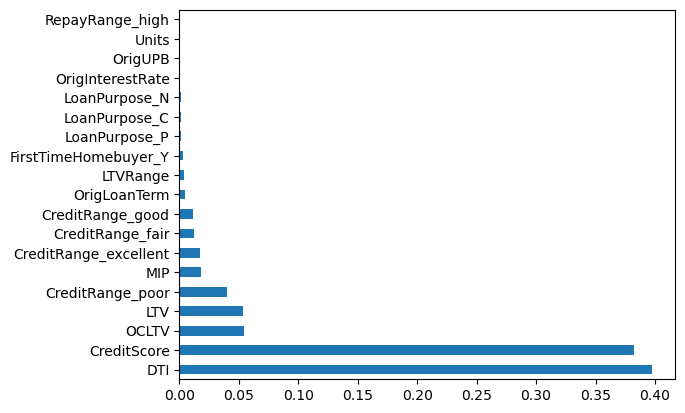

In [ ]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_regression
discrete_features = x.dtypes == int
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y)
mi_scores[::]

OrigUPB                  0.047547
CreditScore              0.035611
CreditRange_poor         0.018783
CreditRange_excellent    0.017687
OrigLoanTerm             0.007728
CreditRange_good         0.006610
LTV                      0.006538
OCLTV                    0.006438
MIP                      0.005563
CreditRange_fair         0.005496
LTVRange                 0.003246
DTI                      0.002040
OrigInterestRate         0.001883
RepayRange_high          0.000960
LoanPurpose_C            0.000485
LoanPurpose_N            0.000065
FirstTimeHomebuyer_Y     0.000000
LoanPurpose_P            0.000000
Units                    0.000000
Name: MI Scores, dtype: float64

In [ ]:
raw_data.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'FirstTimeHomebuyer_Y', 'LTVRange',
       'CreditRange_excellent', 'CreditRange_fair', 'CreditRange_good',
       'CreditRange_poor', 'RepayRange_high'],
      dtype='object')